<a href="https://colab.research.google.com/github/JamesRRR/Coconut-Interpreter/blob/master/lvo_predictionipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# File Processing

In [ ]:
import pandas as pd

path= "drive/My Drive/Colab Notebooks/preHospitalPrediction/project1/dataset/project1_final_data.xlsx"

dataset = pd.read_excel(path, sheet_name = 0)
dataset

,病例编号,性别（男=1；女=2）,年龄,NIHSS总分,1a.意识水平,1b.意识水平提问,1c.意识水平指令,2.注视,3.视野,4.面瘫,5a.左上肢运动,5b.右上肢运动,6a.左下肢运动,6b.右下肢运动,7.共济失调,8.感觉,9.语言,10.构音障碍,11.忽视,吸烟 (是=1；否=2),高血压 (是=1；否=2),房颤 (是=1；否=2),糖尿病 (是=1；否=2),高血脂 (是=1；否=2),冠心病 (是=1；否=2),充血性心衰 (是=1；否=2),既往卒中史 (是=1；否=2),心血管病家族史 (是=1；否=2),高同型半胱氨酸血症 (是=1；否=2),抗血小板药用药史 (是=1；否=2),抗凝药物用药史 (是=1；否=2),溶栓前收缩压(mmHg),溶栓前舒张压(mmHg),大血管闭塞 (是=1；否=2),ICA(1=是;2=否),MCA(1=是;2=否),M1(1=是;2=否),M2(1=是;2=否),BA(1=是;2=否)
0,16619,1,78,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,1,2,2,2,2,2,2,2,2,2,2,156,89.0,2,2,2,2,2,2
1,16616,2,86,24,2,1,1,0,0,3,3,3,3,3,0,1,2,1,1,2,2,2,2,2,1,2,2,2,2,2,2,97,65.0,2,2,2,2,2,2
2,16608,1,82,2,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,2,1,2,2,2,2,2,2,2,2,2,2,131,79.0,2,2,2,2,2,2
3,15877,2,81,2,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,2,2,1,2,2,2,2,2,2,2,2,2,156,76.0,2,2,2,2,2,2
4,15865,1,67,16,1,1,0,1,0,2,4,0,4,0,0,1,0,1,1,2,1,2,2,2,2,2,2,2,2,2,2,185,124.0,1,2,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13948,16629,2,73,14,1,0,0,0,1,2,4,0,4,0,0,1,1,0,0,2,1,1,2,2,2,2,2,2,2,2,2,163,80.0,1,2,1,1,1,2
13949,16628,1,66,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,1,2,2,2,2,2,2,2,2,2,2,169,88.0,1,2,1,1,2,2
13950,16627,1,65,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,2,2,1,2,2,2,2,2,2,1,2,2,135,79.0,2,2,2,2,2,2
13951,16626,2,57,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2,1,2,2,2,2,2,2,2,2,2,2,157,93.0,2,2,2,2,2,2


In [ ]:
# Let's define variables columns
categoricalInputColumns = [
                    '性别（男=1；女=2）',  # Categorical Start
                   '吸烟 (是=1；否=2)',
                   '高血压 (是=1；否=2)',
                   '房颤 (是=1；否=2)', 
                   '糖尿病 (是=1；否=2)', 
                   '冠心病 (是=1；否=2)',
                   '充血性心衰 (是=1；否=2)', 
                   '抗凝药物用药史 (是=1；否=2)'
]

continuousInputColumns = [
                    '年龄',  # Continuous Start
                    '1a.意识水平', 
                   '1b.意识水平提问',
                   '1c.意识水平指令',
                   '2.注视', 
                   '3.视野', 
                   '4.面瘫', 
                   '5a.左上肢运动', 
                   '5b.右上肢运动', 
                   '6a.左下肢运动', 
                   '6b.右下肢运动',
                   '7.共济失调',
                   '8.感觉', 
                   '9.语言', 
                   '10.构音障碍', 
                   '11.忽视', 
                   '溶栓前收缩压(mmHg)',
                   '溶栓前舒张压(mmHg)' # Continuous End
]

inputColumns = categoricalInputColumns + continuousInputColumns

labelColumn = ['大血管闭塞 (是=1；否=2)'] # Label, LVO: large vessel occlusion

allColumns = inputColumns + labelColumn

### Strip Column Name

In [ ]:
dataset = dataset.rename(columns=lambda x: x.strip())

### Convert continuous variable to readable format and filling all missing values with mean, persist imputer

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np
import pickle

# Fill in missing value with average
imputer = SimpleImputer(missing_values = np.nan, strategy="mean")
for column in continuousInputColumns:
  if column not in dataset:
    print(column)
dataset[continuousInputColumns] = imputer.fit_transform(dataset[continuousInputColumns])

# persist the encoder somewhere to make sure we can fill in missing values for incoming data
filePath = 'drive/My Drive/Colab Notebooks/preHospitalPrediction/project1/encoder/filling_value' + '.pkl'
with open (filePath, 'wb') as f:
    pickle.dump(imputer, open (filePath, 'wb'))

dataset

,病例编号,性别（男=1；女=2）,年龄,NIHSS总分,1a.意识水平,1b.意识水平提问,1c.意识水平指令,2.注视,3.视野,4.面瘫,5a.左上肢运动,5b.右上肢运动,6a.左下肢运动,6b.右下肢运动,7.共济失调,8.感觉,9.语言,10.构音障碍,11.忽视,吸烟 (是=1；否=2),高血压 (是=1；否=2),房颤 (是=1；否=2),糖尿病 (是=1；否=2),高血脂 (是=1；否=2),冠心病 (是=1；否=2),充血性心衰 (是=1；否=2),既往卒中史 (是=1；否=2),心血管病家族史 (是=1；否=2),高同型半胱氨酸血症 (是=1；否=2),抗血小板药用药史 (是=1；否=2),抗凝药物用药史 (是=1；否=2),溶栓前收缩压(mmHg),溶栓前舒张压(mmHg),大血管闭塞 (是=1；否=2),ICA(1=是;2=否),MCA(1=是;2=否),M1(1=是;2=否),M2(1=是;2=否),BA(1=是;2=否)
0,16619,1,78.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2,1,2,2,2,2,2,2,2,2,2,2,156.0,89.0,2,2,2,2,2,2
1,16616,2,86.0,24,2.0,1.0,1.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,0.0,1.0,2.0,1.0,1.0,2,2,2,2,2,1,2,2,2,2,2,2,97.0,65.0,2,2,2,2,2,2
2,16608,1,82.0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,2,2,2,2,2,2,2,2,2,2,131.0,79.0,2,2,2,2,2,2
3,15877,2,81.0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,1,2,2,2,2,2,2,2,2,2,156.0,76.0,2,2,2,2,2,2
4,15865,1,67.0,16,1.0,1.0,0.0,1.0,0.0,2.0,4.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0,2,1,2,2,2,2,2,2,2,2,2,2,185.0,124.0,1,2,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13948,16629,2,73.0,14,1.0,0.0,0.0,0.0,1.0,2.0,4.0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,2,1,1,2,2,2,2,2,2,2,2,2,163.0,80.0,1,2,1,1,1,2
13949,16628,1,66.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2,1,2,2,2,2,2,2,2,2,2,2,169.0,88.0,1,2,1,1,2,2
13950,16627,1,65.0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,2,1,2,2,2,2,2,2,1,2,2,135.0,79.0,2,2,2,2,2,2
13951,16626,2,57.0,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,2,2,2,2,2,2,2,2,2,2,157.0,93.0,2,2,2,2,2,2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convert label column to (是=1；否=2) -> True.Flase
for label in labelColumn:
  dataset[label] = dataset[label].apply(lambda x : True if x == 1 else False)

for col in categoricalInputColumns:
  # if col in specialCols:
  #   continue
  dataset[col] = dataset[col].map({2: False, 1: True, np.nan: False}) 

# old : new
dataset = dataset.rename(columns={
                   '性别（男=1；女=2）': 'gender', 
                   '吸烟 (是=1；否=2)': 'smoke',
                   '高血压 (是=1；否=2)': 'highBloodPressure',
                   '房颤 (是=1；否=2)': 'atrialFibrillation', 
                   '糖尿病 (是=1；否=2)': 'diabetes', 
                   '冠心病 (是=1；否=2)': 'coronaryHeartDisease',
                   '充血性心衰 (是=1；否=2)': 'congestiveHeartFailure', 
                   '抗凝药物用药史 (是=1；否=2)': 'anticoagulantMedicalHistory',
                   '年龄': 'age',
                    '1a.意识水平': 'NIHSS1a', 
                   '1b.意识水平提问': 'NIHSS1b',
                   '1c.意识水平指令': 'NIHSS1c',
                   '2.注视': 'NIHSS2', 
                   '3.视野': 'NIHSS3', 
                   '4.面瘫': 'NIHSS4', 
                   '5a.左上肢运动': 'NIHSS5a', 
                   '5b.右上肢运动': 'NIHSS5b', 
                   '6a.左下肢运动': 'NIHSS6a', 
                   '6b.右下肢运动': 'NIHSS6b',
                   '7.共济失调' : 'NIHSS7',
                   '8.感觉': 'NIHSS8', 
                   '9.语言': 'NIHSS9', 
                   '10.构音障碍': 'NIHSS10', 
                   '11.忽视': 'NIHSS11', 
                   '溶栓前收缩压(mmHg)': 'preThrombolysisPressure',
                   '溶栓前舒张压(mmHg)': 'afterThrombolysisPressure',
                    '大血管闭塞 (是=1；否=2)': 'LVO',
})
dataset

length of data set is 13953


,病例编号,gender,age,NIHSS总分,NIHSS1a,NIHSS1b,NIHSS1c,NIHSS2,NIHSS3,NIHSS4,NIHSS5a,NIHSS5b,NIHSS6a,NIHSS6b,NIHSS7,NIHSS8,NIHSS9,NIHSS10,NIHSS11,smoke,highBloodPressure,atrialFibrillation,diabetes,高血脂 (是=1；否=2),coronaryHeartDisease,congestiveHeartFailure,既往卒中史 (是=1；否=2),心血管病家族史 (是=1；否=2),高同型半胱氨酸血症 (是=1；否=2),抗血小板药用药史 (是=1；否=2),anticoagulantMedicalHistory,preThrombolysisPressure,afterThrombolysisPressure,LVO,ICA(1=是;2=否),MCA(1=是;2=否),M1(1=是;2=否),M2(1=是;2=否),BA(1=是;2=否)
0,16619,True,78.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,False,True,False,False,2,False,False,2,2,2,2,False,156.0,89.0,False,2,2,2,2,2
1,16616,False,86.0,24,2.0,1.0,1.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,0.0,1.0,2.0,1.0,1.0,False,False,False,False,2,True,False,2,2,2,2,False,97.0,65.0,False,2,2,2,2,2
2,16608,True,82.0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,2,False,False,2,2,2,2,False,131.0,79.0,False,2,2,2,2,2
3,15877,False,81.0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False,2,False,False,2,2,2,2,False,156.0,76.0,False,2,2,2,2,2
4,15865,True,67.0,16,1.0,1.0,0.0,1.0,0.0,2.0,4.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0,False,True,False,False,2,False,False,2,2,2,2,False,185.0,124.0,True,2,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13948,16629,False,73.0,14,1.0,0.0,0.0,0.0,1.0,2.0,4.0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,False,True,True,False,2,False,False,2,2,2,2,False,163.0,80.0,True,2,1,1,1,2
13949,16628,True,66.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,False,True,False,False,2,False,False,2,2,2,2,False,169.0,88.0,True,2,1,1,2,2
13950,16627,True,65.0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False,False,True,False,2,False,False,2,2,1,2,False,135.0,79.0,False,2,2,2,2,2
13951,16626,False,57.0,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,2,False,False,2,2,2,2,False,157.0,93.0,False,2,2,2,2,2


In [ ]:
# dataset.to_csv("drive/My Drive/Colab Notebooks/preHospitalPrediction/project1/dataset/project1_04082021_processed_data.csv", encoding='utf_8_sig')

# Import File & Define Columns

In [2]:
 # Let's define variables columns
categoricalInputColumns = [
                  'gender',  # Categorical Start
                  'smoke',
                  'highBloodPressure',
                  'atrialFibrillation', 
                  # 'pastAtrialFibrillation', 
                  # 'IHD',
                  # 'newAtrialFibrillation',
                  'diabetes', 
                  'coronaryHeartDisease',
                  'congestiveHeartFailure', 
                  'anticoagulantMedicalHistory'
]

continuousInputColumns = [
                   'age',  # Continuous Start
                   'NIHSS1a', 
                   'NIHSS1b',
                   'NIHSS1c',
                   'NIHSS2', 
                   'NIHSS3', 
                   'NIHSS4', 
                   'NIHSS5a', 
                   'NIHSS5b', 
                   'NIHSS6a', 
                   'NIHSS6b',
                   'NIHSS7',
                   'NIHSS8', 
                   'NIHSS9', 
                   'NIHSS10', 
                   'NIHSS11', 
                   'preThrombolysisPressure',
                   'afterThrombolysisPressure' # Continuous End
]

inputColumns = categoricalInputColumns + continuousInputColumns

#labelColumn = ['ICA', 'BA', 'MCA'] # Label, LVO: large vessel occlusion
labelColumn = ['LVO']
allColumns = inputColumns + labelColumn

In [3]:
#!pip install scikit-learn==0.20.4
import sklearn
print(sklearn.__version__) # 0.22.2.post1
# import tensorflow as tf

0.22.2.post1


In [4]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("drive/My Drive/Colab Notebooks/preHospitalPrediction/project1/dataset/project1_04082021_processed_data.csv", header=0)

dataset

,Unnamed: 0,病例编号,gender,age,NIHSS总分,NIHSS1a,NIHSS1b,NIHSS1c,NIHSS2,NIHSS3,NIHSS4,NIHSS5a,NIHSS5b,NIHSS6a,NIHSS6b,NIHSS7,NIHSS8,NIHSS9,NIHSS10,NIHSS11,smoke,highBloodPressure,atrialFibrillation,diabetes,高血脂 (是=1；否=2),coronaryHeartDisease,congestiveHeartFailure,既往卒中史 (是=1；否=2),心血管病家族史 (是=1；否=2),高同型半胱氨酸血症 (是=1；否=2),抗血小板药用药史 (是=1；否=2),anticoagulantMedicalHistory,preThrombolysisPressure,afterThrombolysisPressure,LVO,ICA(1=是;2=否),MCA(1=是;2=否),M1(1=是;2=否),M2(1=是;2=否),BA(1=是;2=否)
0,0,16619,True,78.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,False,True,False,False,2,False,False,2,2,2,2,False,156.0,89.0,False,2,2,2,2,2
1,1,16616,False,86.0,24,2.0,1.0,1.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,0.0,1.0,2.0,1.0,1.0,False,False,False,False,2,True,False,2,2,2,2,False,97.0,65.0,False,2,2,2,2,2
2,2,16608,True,82.0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,2,False,False,2,2,2,2,False,131.0,79.0,False,2,2,2,2,2
3,3,15877,False,81.0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False,2,False,False,2,2,2,2,False,156.0,76.0,False,2,2,2,2,2
4,4,15865,True,67.0,16,1.0,1.0,0.0,1.0,0.0,2.0,4.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0,False,True,False,False,2,False,False,2,2,2,2,False,185.0,124.0,True,2,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13948,13948,16629,False,73.0,14,1.0,0.0,0.0,0.0,1.0,2.0,4.0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,False,True,True,False,2,False,False,2,2,2,2,False,163.0,80.0,True,2,1,1,1,2
13949,13949,16628,True,66.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,False,True,False,False,2,False,False,2,2,2,2,False,169.0,88.0,True,2,1,1,2,2
13950,13950,16627,True,65.0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False,False,True,False,2,False,False,2,2,1,2,False,135.0,79.0,False,2,2,2,2,2
13951,13951,16626,False,57.0,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,2,False,False,2,2,2,2,False,157.0,93.0,False,2,2,2,2,2


In [6]:
dataset[labelColumn].value_counts()

LVO  
False    9511
True     4442
dtype: int64

In [44]:
import random

# when debugging, do not write files or tune models
debugMode = True
saveFile = False

# define seed in the very beginning
seed = 42
# seed = 47

In [8]:
pip install category_encoders

     |████████████████████████████████| 81kB 3.5MB/s 


# Helper Functions to be defined

## PrePreprocessor

In [42]:
# %%writefile preprocess.py
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import *
import category_encoders as ce

def flatten(listOfLists):
    """Flatten a list of (lists of (lists of strings)) for any level 
    of nesting"""
    result = []

    for i in listOfLists:
        # Only append if i is a basestring (superclass of string)
        if isinstance(i, str) or isinstance(i, int):
            result.append(i)
        # Otherwise call this function recursively
        else:
            result.extend(flatten(i))
    return result

class PreProcessor(object):
  def __init__(self):
    self._encoder = None
    self._labelEncoder = None
    self._pcaEncoder = None
    self._featureEliminator = None
    self._normalizer = None
    self._featureName = None

  def normalize(self, contFeatures_train):
    if contFeatures_train.empty:
      return contFeatures_train

    if self._normalizer is None:
      normalizer = preprocessing.Normalizer()
      normalizer.fit(contFeatures_train)
      self._normalizer = normalizer

    contFeatures_train_values = self._normalizer.transform(contFeatures_train)

    return pd.DataFrame(contFeatures_train_values, columns=contFeatures_train.columns, index=contFeatures_train.index)

  def eliminateFeatures(self, feature, label = None, scoreFunction=None):
    if self._featureEliminator is None:
      numOfFeatures = 15
      if scoreFunction is None:
        selector = SelectKBest(f_regression, k=numOfFeatures)
      else:
        selector = SelectKBest(scoreFunction, k=numOfFeatures)
      selector.fit(feature, label)
      self._featureEliminator = selector
      # self._featureName = feature

    columns = [i for (i, v) in zip(feature.columns, self._featureEliminator.get_support()) if v]
    print("leftover columns are")
    print(columns)

    return pd.DataFrame(self._featureEliminator.transform(feature), columns=columns, index=feature.index)

  def encodeFeatures(self, categoricalFeatures, continuousFeatures, normalize=True, enc=None, label=None, useCommonEncoder=False):
    if categoricalFeatures.empty: 
      encodedFeatures = continuousFeatures

    else:
      encoder_path = "drive/My Drive/Colab Notebooks/preHospitalPrediction/project2/commonencoder/encoder.pkl"

      if self._encoder is None:
        if useCommonEncoder:
          print("use common encoder")
          if os.path.exists(encoder_path):
            print("common encoder exists, let's use it")
            with open (encoder_path, 'rb') as f:
              enc = pickle.load(f)
          else:
            print("generate a new common encoder")
            enc = ce.OrdinalEncoder(cols=categoricalFeatures.columns)

        else:
          if enc == 'BackwardDifferenceEncoder':
            enc = ce.BackwardDifferenceEncoder(cols=categoricalFeatures.columns)
          elif enc == 'BinaryEncoder':
            enc = ce.BinaryEncoder(cols=categoricalFeatures.columns)
          elif enc == 'CatBoostEncoder':
            enc = ce.CatBoostEncoder(cols=categoricalFeatures.columns)
          elif enc == 'GLMMEncoder':
            enc = ce.GLMMEncoder(cols=categoricalFeatures.columns)
          elif enc == 'HashingEncoder':
            enc = ce.HashingEncoder(cols=categoricalFeatures.columns)
          elif enc == 'HelmertEncoder':
            enc = ce.HelmertEncoder(cols=categoricalFeatures.columns)
          elif enc == 'JamesSteinEncoder':
            enc = ce.JamesSteinEncoder(cols=categoricalFeatures.columns)
          elif enc == 'LeaveOneOutEncoder':
            enc = ce.LeaveOneOutEncoder(cols=categoricalFeatures.columns)
          elif enc == 'MEstimateEncoder':
            enc = ce.MEstimateEncoder(cols=categoricalFeatures.columns)
          elif enc == 'OneHotEncoder':
            enc = ce.OneHotEncoder(cols=categoricalFeatures.columns)
          elif enc == 'OrdinalEncoder':
            enc = ce.OrdinalEncoder(cols=categoricalFeatures.columns)
          elif enc == 'SumEncoder':
            enc = ce.SumEncoder(cols=categoricalFeatures.columns)
          elif enc == 'PolynomialEncoder':
            enc = ce.PolynomialEncoder(cols=categoricalFeatures.columns)
          elif enc == 'TargetEncoder':
            enc = ce.TargetEncoder(cols=categoricalFeatures.columns)
          elif enc == 'WOEEncoder':
            enc = ce.WOEEncoder(cols=categoricalFeatures.columns)
          else:
            raise ValueError("encoder is not defnied, the value passed in is: ", enc)

        print(categoricalFeatures.columns)
        enc.fit(categoricalFeatures, y=label)
        self._encoder = enc

        if not os.path.exists(encoder_path) and useCommonEncoder:
          with open (encoder_path, 'wb') as f:
              pickle.dump(enc, f)
        
      # Encode the categorical features
      categoricalFeatures = pd.DataFrame(self._encoder.transform(categoricalFeatures),
                                          columns=self._encoder.get_feature_names(),
                                          index=categoricalFeatures.index)

      # normalize
      continuousFeatures = self.normalize(continuousFeatures)

      # Add the continuous features to the end of the categorical features
      encodedFeatures = pd.concat([categoricalFeatures, continuousFeatures], axis=1)
    return encodedFeatures

  def reduceDimension(self, feature, pcaDimension=0.95):
    if self._pcaEncoder is None:
      pca = PCA(n_components = pcaDimension)
      pca.fit(feature)
      self._pcaEncoder = pca

    selected_feature = self._pcaEncoder.transform(feature)
    print("original shape:   ", feature.shape)
    print("transformed shape:", selected_feature.shape)

      # print("components are:")
      # print(pca.components_)
      # print("explained_variance_ is:")
      # print(pca.explained_variance_)

    return pd.DataFrame(selected_feature, index=feature.index)

  def encodeLables(self, label):
    if self._labelEncoder is None:
        lb = preprocessing.LabelBinarizer()
        encodedLabel = lb.fit(label)
        self._labelEncoder = lb

        # print classes for readability
        print(lb.classes_)

    # Encode the categorical features
    encodedLabel = self._labelEncoder.transform(np.reshape(label.values, (-1, 1)))
    
    return encodedLabel

  def decodeLables(self, label_test, label_pred):
    label_test = self._labelEncoder.inverse_transform(label_test)
    label_pred = self._labelEncoder.inverse_transform(label_pred)
    labels = self._labelEncoder.classes_

    return label_test, label_pred, labels

  def preprocess(self, features, cat_columns, cont_columns, label=None, enc=None, score_function=None, is_test=False, useCommonEncoder=False):
    self._featureName = features

    features = self.eliminateFeatures(features, label, score_function)
    new_feature_names = [i for (i, v) in zip(self._featureName, self._featureEliminator.get_support()) if v ]
    cat_columns = list(filter(lambda x: x in new_feature_names, cat_columns)) 
    cont_columns = list(filter(lambda x: x in new_feature_names, cont_columns)) 

    # split categorical data and continuous data
    catFeatures_train = features.loc[:, cat_columns]
    contFeatures_train = features.loc[:, cont_columns]

    # encode & normalize
    features = self.encodeFeatures(
        catFeatures_train, contFeatures_train, normalize=True, label=label, enc=enc, useCommonEncoder=useCommonEncoder)
        
    return features

## Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

def splitData(trainTestRatio):
  # Get features from dataset
  features = dataset.loc[:, categoricalInputColumns + continuousInputColumns]
  labels = dataset.loc[:, labelColumn]

  # Train split data before bootstrap to make sure nothing is duplicated, stratify based on label
  feature_train, feature_test, label_train, label_test = \
      train_test_split(features, labels ,test_size=trainTestRatio, random_state=seed, stratify=labels)

  return feature_train, feature_test, label_train, label_test, categoricalInputColumns, continuousInputColumns

In [10]:
# dataset['LVO'].value_counts()

## Encode Data

In [21]:
import pickle
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import category_encoders as ce

def encodeData(feature_train, feature_test, label_train, label_test, enc=None, scoreFunction=None):

  # Initialize a preprocess object
  preProcessor = PreProcessor()

  feature_train = preProcessor.preprocess(feature_train, categoricalInputColumns, continuousInputColumns, label=label_train, score_function=scoreFunction, enc=enc)

  # encode labels
  label_train = preProcessor.encodeLables(label_train)

  if saveFile:
    # persist preProcessor (encoder included here)
    filePath = 'drive/My Drive/Colab Notebooks/preHospitalPrediction/project1/preprocessor.pkl'
    with open (filePath, 'wb') as f:
          pickle.dump(preProcessor, f)

  feature_test = preProcessor.preprocess(feature_test, categoricalInputColumns, continuousInputColumns, label=None, score_function=scoreFunction)

  print("check test 8")
  # encode labels
  label_test = preProcessor.encodeLables(label_test)

  return preProcessor, feature_train, feature_test, label_train, label_test

## Resample Data

In [12]:
from imblearn.over_sampling import SMOTE 
from collections import Counter

def resampleData(feature_train, label_train):
  sm = SMOTE(random_state=seed)
  feature_train_resampled, label_train = sm.fit_resample(feature_train, label_train)
  print('Resampled dataset shape %s' % Counter(label_train))
  
  # return a new dataframe
  feature_train = pd.DataFrame(feature_train_resampled, columns=feature_train.columns)

  return feature_train, label_train

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Parameter Tuning

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import numpy as np
import pprint
import pickle

def parameterTuning(model, feature_train, label_train, feature_test, label_test):
  
  if model == 'knn':
    gridDict = ['n_neighbors', 'leaf_size', 'weights', 'algorithm']
    grid = {
        'n_neighbors':[3, 5, 8, 10, 15],
        'leaf_size':[3, 5, 10],
        'weights':['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree','kd_tree','brute']}
    modelClassifier = KNeighborsClassifier()

    # do not tune our model for better runtime
    if debugMode:
      gridDict = ['n_neighbors']
      grid = {'n_neighbors':[10]}

  elif model == 'rf':
    gridDict = ['n_estimators', 'max_depth', 'bootstrap', 'max_features', 'min_samples_leaf', 'min_samples_split']
    grid = {
        'n_estimators': [30, 50],
        'max_depth': [10,15,20],
        'bootstrap': [True, False],
        'max_features': [5,8, None],
        'min_samples_leaf': [5, 10],
        'min_samples_split': [5, 10],
    }

    if debugMode:
      gridDict = ['n_estimators']
      grid = {'n_estimators': [10]}

    modelClassifier = RandomForestClassifier()

  elif model == 'lr':
    gridDict = ['C', 'penalty', 'max_iter']
    grid = {
        'C': [0.001, 0.01, 0.1],
        "penalty":["l1","l2"],
        "max_iter": [300]
      }
    modelClassifier = LogisticRegression()

    # do not tune our model for better runtime, use a default
    if debugMode:
      gridDict = ['max_iter']
      grid = {'max_iter':[100]}

  elif model == "ada":
    gridDict = ['n_estimators', 'learning_rate']
    grid = {
        'n_estimators': [10, 30, 50],
        "learning_rate": [1, 0.5]
      }
    modelClassifier = AdaBoostClassifier()

    # do not tune our model for better runtime, use a default
    if debugMode:
      gridDict = ['n_estimators']
      grid = {'n_estimators':[50]}

  # Not Tunable, seems not to be useful, can remove
  elif model == "gnb":
    clf = GaussianNB()
    clf.fit(feature_train, label_train)
    grid_result = None
    best_classifier = clf

  elif model == 'xgb':
    gridDict = ['learning_rate', 'n_estimators', 'max_depth']
    grid = {
        'learning_rate': [0.1, 0.5, 1],
        "n_estimators":[10, 25, 50],
        "max_depth": [5, 10, 15]
      }
    modelClassifier = XGBClassifier()

    # do not tune our model for better runtime, use a default
    if debugMode:
      gridDict = ['learning_rate']
      grid = {'learning_rate':[0.1]}

  else:
    raise ValueError('undefined model') 

  if model != "gnb":
    # output best classifier
    grid_result = runGrid(gridDict, grid, modelClassifier, feature_train, label_train, feature_test, label_test, model)
    best_classifier = grid_result.best_estimator_ 

  if saveFile:
    # peresited our tunned model
    filePath = "drive/My Drive/Colab Notebooks/preHospitalPrediction/project1/models/persistedModel.pkl"
    with open(filePath, 'wb') as file:
        finalModel = pickle.dump(best_classifier, file)

  return grid_result, best_classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import pprint
import pickle

def runGrid(gridDict, grid, classifier, feature_train, label_train, feature_test, label_test, model, cv=5):
  currentGrid = {}
  numToTune = len(gridDict)

  for i in range((numToTune+1)//2):
    firstKey = gridDict[2*i]
    currentGrid[firstKey] = grid.get(firstKey)

    secondKeyExists = True if 2*i + 1 != numToTune else False

    if secondKeyExists:
      secondKey = gridDict[2*i + 1]
      currentGrid[secondKey] = grid.get(secondKey)

    print("current grid used is: ")
    print(currentGrid)
      
    grid_search = GridSearchCV(estimator=classifier,
        param_grid=currentGrid,
        cv=cv,
        verbose=0,
        n_jobs=-1,
        scoring ='f1_weighted')

    grid_result = grid_search.fit(feature_train, label_train)

    printSummary(grid_result, feature_test, label_test)

    # plot tuning result graph
    if secondKeyExists:
      plot_grid_search_2d(grid_result.cv_results_, currentGrid[firstKey], currentGrid[secondKey], firstKey, secondKey, model)
    else:
      plot_grid_search_1d(grid_result.cv_results_, currentGrid[firstKey], firstKey, model)

    # Let's print best param, and set them back
    currentGrid[firstKey] = [grid_result.best_params_[firstKey]]

    if secondKeyExists:
      currentGrid[secondKey] = [grid_result.best_params_[secondKey]]

    print(grid_result.best_params_)

    if model == 'lr':
        # get importance
        importance = grid_result.best_estimator_.coef_
        print("importance is ")
        print(importance)
        print(grid_result.best_estimator_.classes_)

  return grid_result

## Plot Grid Search Tuning Progress


In [15]:
import matplotlib.pyplot as plt

def plot_grid_search_2d(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2, model):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    title = "Grid Search Scores for {name_param_1} and {name_param_2}".format(name_param_1 = name_param_1, name_param_2 = name_param_2)
    
    ax.set_title(title, fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')
        
    if saveFile:
      fileName = "drive/My Drive/Colab Notebooks/preHospitalPrediction/project1/graphs/{name_param_1}_{name_param_2}_paramTuning".format(name_param_1 = name_param_1, name_param_2 = name_param_2)
      plt.savefig(fileName)
    plt.close()

def plot_grid_search_1d(cv_results, grid_param_1, name_param_1, model):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']

    scores_sd = cv_results['std_test_score']

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis
    ax.plot(grid_param_1, scores_mean, '-o')

    title = "Grid Search Scores for {name_param_1}".format(name_param_1 = name_param_1)
    
    ax.set_title(title, fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')
  
    if saveFile:
      fileName = "drive/My Drive/Colab Notebooks/preHospitalPrediction/project1/graphs/{name_param_1}_paramTuning".format(name_param_1 = name_param_1)
      plt.savefig(fileName)
    plt.close()

In [16]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score

def printSummary(grid_result, feature_test, label_test):
  # summarize results
  print('Execution time is %s minutes' % grid_result.refit_time_)
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']

  for mean, stdev, param in zip(means, stds, params):
      print("%f (%f) with: %r" % (mean, stdev, param))
      
  # Check prediction result, for scoring purpose, let check FP / (TP + FP ) = recall
  best_classifier = grid_result.best_estimator_
  label_pred = best_classifier.predict(feature_test)
  precision, recall, fscore, support = precision_recall_fscore_support(label_test, label_pred)
  auc = roc_auc_score(label_test, label_pred)
  print("Precision is %s \nRecall is %s \nFscore is %s \nSupport is %s \nAUC is %s" % (precision, recall, fscore, support, auc))

## Plot Result

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns

def plotResult(preProcessor, label_test, label_pred, model):
  # Construct and plot ROC AUC
  fpr, tpr, threshold = metrics.roc_curve(label_test, label_pred)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  # Construct and plot confidence level
  seed = 42
  n_bootstraps = 1000
  bootstrapped_scores = []
  rng = np.random.RandomState(seed)
  for i in range(n_bootstraps):
      # bootstrap by sampling with replacement on the prediction indices
      indices = rng.randint(0, len(label_pred), len(label_pred))
      if len(np.unique(label_test[indices])) < 2:
          # We need at least one positive and one negative sample for ROC AUC
          # to be defined: reject the sample
          continue

      score = roc_auc_score(label_test[indices], label_pred[indices])
      bootstrapped_scores.append(score)

  sorted_scores = np.array(bootstrapped_scores)
  sorted_scores.sort()

  # Computing the lower and upper bound of the 90% confidence interval
  # You can change the bounds percentiles to 0.025 and 0.975 to get
  # a 95% confidence interval instead.
  confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
  confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
  title = "Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
      confidence_lower, confidence_upper)
  print(title)

  filePath = "drive/My Drive/Colab Notebooks/preHospitalPrediction/project1/graphs/%s_confidence_level.pkl" % model
  graphPath = "drive/My Drive/Colab Notebooks/preHospitalPrediction/project1/graphs/%s_confidence_level.png" % model
  with open (filePath, 'wb') as f:
    pickle.dump(bootstrapped_scores, f)

  plt.hist(bootstrapped_scores, bins=50)
  plt.title(title)
  plt.show()
  plt.savefig(graphPath)

  if not debugMode:
    label_test, label_pred, labels = preProcessor.decodeLables(label_test, label_pred)
    cm = confusion_matrix(label_test, label_pred, labels)
    print(cm)

    # Plot confusion matrix
    # https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    categories = ["not LVO", "LVO"]
    group_counts = cm.flatten()
    group_counts_str = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
    group_total_count = [group_counts[0] + group_counts[1],
                        group_counts[0] + group_counts[1],
                        group_counts[2] + group_counts[3],
                        group_counts[2] + group_counts[3]]
    group_percentages = ["{0:.2%}".format(v1/v2) for v1, v2 in
                        zip(group_counts, group_total_count)]
    cm_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts_str,group_percentages)]
    cm_labels = np.asarray(cm_labels).reshape(2,2)

    title = "Confusion Matrix for LVO prediction"

    precision, recall, fscore, support = precision_recall_fscore_support(label_test, label_pred, average='macro')
    auc = roc_auc_score(label_test, label_pred)
    message = "Precision is %s \nRecall is %s \nFscore is %s \nSupport is %s \nAUC is %s" % (precision, recall, fscore, support, auc)
    print(message)

    figsize = plt.rcParams.get('figure.figsize')
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=cm_labels, fmt="", cmap='Blues', xticklabels=categories,yticklabels=categories)

    plt.ylabel('True label')
    plt.xlabel('Predicted label\n' + message)
    plt.title(title)
    plt.show()

    if saveFile:
      filePath = "drive/My Drive/Colab Notebooks/preHospitalPrediction/project1/graphs/%s_confusion_matric.png" % model
      plt.savefig(filePath)

    plt.close()

  return auc

# Run All


In [40]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.feature_selection import *

# when debugging, do not write files or tune models
# debugMode = True
# saveFile = True

def runAll(models, trainTestRatio=0.2, encs=[None], scoreFunctions=[None]):
  auc = 0
  # Step 1: filling missing data, done in file processing level
  for scoreFunction in scoreFunctions:
    if scoreFunction == 'f_classif':
        scoreFunction = f_classif
    elif scoreFunction == 'mutual_info_classif':
      scoreFunction = mutual_info_classif
    elif scoreFunction == 'chi2':
      scoreFunction = chi2
    elif scoreFunction == 'f_regression':
      scoreFunction = f_regression
    elif scoreFunction == 'mutual_info_regression':
      scoreFunction = mutual_info_regression
    else:
      raise ValueError("scoreFunction is not defnied, the value passed in is: " , scoreFunction)

    print("@@@@@@@@@@@@@@@@@@@@@@   ScoreFunction:{scoreFunction}   @@@@@@@@@@@@@@@@@@@@@".format(scoreFunction = scoreFunction))

    for enc in encs:
      print("$$$$$$$$$$$$$$$$$$$$$$$$   Enc:{enc}   $$$$$$$$$$$$$$$$$$$$$$$".format(enc = enc))

      # Step 2: Split data into training and testing before bootstrap to make sure no resampled data in test data
      feature_train, feature_test, label_train, label_test, _, _ = splitData(trainTestRatio=trainTestRatio)

      # Step 3: Encode Data, process pipelin - Filter Data(RFE) / Resample Data / Split Cat variables and Con variables / Encode & Normalize All / Apply PCA / Encode lables / Persist and apply the same process to test data
      preProcessor, encoded_feature_train, encoded_feature_test, encoded_label_train, encoded_label_test = encodeData(feature_train, feature_test, label_train, label_test, enc=enc, scoreFunction=scoreFunction)

      # Step 4: Resample features 
      # encoded_feature_train, encoded_label_train = resampleData(encoded_feature_train, encoded_label_train)

      for model in models:

        print("############### Model: {model} ###############".format(model = model))
        # training with parameter tuning
        grid_result, best_classifier = parameterTuning(model, encoded_feature_train, encoded_label_train, encoded_feature_test, encoded_label_test)

        # plot result
        label_pred = best_classifier.predict(encoded_feature_test)
        auc = max(plotResult(preProcessor, encoded_label_test, label_pred, model), auc)
  return auc

@@@@@@@@@@@@@@@@@@@@@@   ScoreFunction:<function f_classif at 0x7fbddfd3cd40>   @@@@@@@@@@@@@@@@@@@@@
$$$$$$$$$$$$$$$$$$$$$$$$   Enc:HelmertEncoder   $$$$$$$$$$$$$$$$$$$$$$$
leftover columns are
['atrialFibrillation', 'NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS3', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS8', 'NIHSS9', 'NIHSS10', 'NIHSS11']
Index(['atrialFibrillation'], dtype='object')
[False  True]
leftover columns are
['atrialFibrillation', 'NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS3', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS8', 'NIHSS9', 'NIHSS10', 'NIHSS11']
check test 8
############### Model: rf ###############
current grid used is: 
{'n_estimators': [30, 50], 'max_depth': [10, 15, 20]}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.5084893703460693 minutes
Best: 0.771662 using {'max_depth': 10, 'n_estimators': 50}
0.768252 (0.006357) with: {'max_depth': 10, 'n_estimators': 30}
0.771662 (0.003501) with: {'max_depth': 10, 'n_estimators': 50}
0.760583 (0.003829) with: {'max_depth': 15, 'n_estimators': 30}
0.763412 (0.001057) with: {'max_depth': 15, 'n_estimators': 50}
0.750103 (0.004908) with: {'max_depth': 20, 'n_estimators': 30}
0.752866 (0.004931) with: {'max_depth': 20, 'n_estimators': 50}
Precision is [0.81755424 0.6802097 ] 
Recall is [0.87171399 0.58380202] 
Fscore is [0.8437659 0.6283293] 
Support is [1902  889] 
AUC is 0.7277580050127803
{'max_depth': 10, 'n_estimators': 50}
current grid used is: 
{'n_estimators': [50], 'max_depth': [10], 'bootstrap': [True, False], 'max_features': [5, 8, None]}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.7787857055664062 minutes
Best: 0.769457 using {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'n_estimators': 50}
0.767540 (0.004139) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 50}
0.769457 (0.002596) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'n_estimators': 50}
0.767434 (0.006936) with: {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'n_estimators': 50}
0.768619 (0.003845) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 5, 'n_estimators': 50}
0.768630 (0.005102) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 8, 'n_estimators': 50}
0.755444 (0.007094) with: {'bootstrap': False, 'max_depth': 10, 'max_features': None, 'n_estimators': 50}
Precision is [0.81701286 0.67490247] 
Recall is [0.86855941 0.58380202] 
Fscore is [0.84199796 0.62605549] 
Support is [1902  889] 
AUC is 0.7261807179465344
{'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'n_estimators': 50}
cur

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.7351300716400146 minutes
Best: 0.771276 using {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}
0.769965 (0.003157) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 50}
0.768808 (0.003654) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}
0.769607 (0.001777) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 50}
0.771276 (0.001804) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}
Precision is [0.81533952 0.68682796] 
Recall is [0.87749737 0.57480315] 
Fscore is [0.84527729 0.62584201] 
Support is [1902  889] 
AUC is 0.7261502603972609
{'bootstrap': True, 'max_depth': 10, 'max_features'

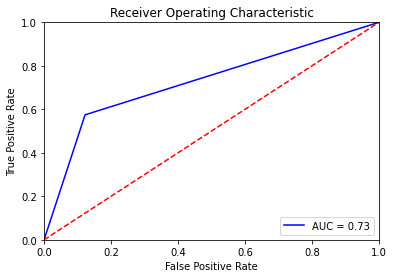

Confidence interval for the score: [0.711 - 0.74]


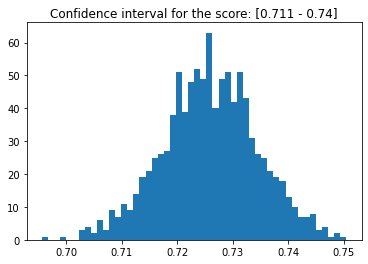

[[1669  233]
 [ 378  511]]
Precision is 0.751083739119929 
Recall is 0.726150260397261 
Fscore is 0.735559646980942 
Support is None 
AUC is 0.7261502603972609


<Figure size 432x288 with 0 Axes>

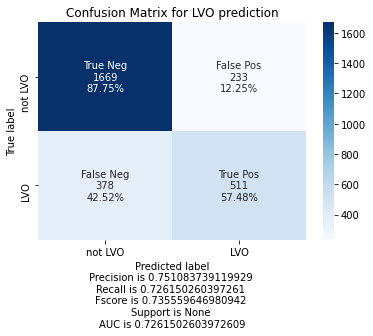

$$$$$$$$$$$$$$$$$$$$$$$$   Enc:OrdinalEncoder   $$$$$$$$$$$$$$$$$$$$$$$
leftover columns are
['atrialFibrillation', 'NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS3', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS8', 'NIHSS9', 'NIHSS10', 'NIHSS11']
Index(['atrialFibrillation'], dtype='object')
[False  True]
leftover columns are
['atrialFibrillation', 'NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS3', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS8', 'NIHSS9', 'NIHSS10', 'NIHSS11']
check test 8
############### Model: rf ###############
current grid used is: 
{'n_estimators': [30, 50], 'max_depth': [10, 15, 20]}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.42411255836486816 minutes
Best: 0.772557 using {'max_depth': 10, 'n_estimators': 50}
0.772126 (0.002898) with: {'max_depth': 10, 'n_estimators': 30}
0.772557 (0.004140) with: {'max_depth': 10, 'n_estimators': 50}
0.759758 (0.005185) with: {'max_depth': 15, 'n_estimators': 30}
0.761438 (0.002863) with: {'max_depth': 15, 'n_estimators': 50}
0.753521 (0.004649) with: {'max_depth': 20, 'n_estimators': 30}
0.755632 (0.002413) with: {'max_depth': 20, 'n_estimators': 50}
Precision is [0.81515892 0.6849866 ] 
Recall is [0.87644585 0.57480315] 
Fscore is [0.84469217 0.62507645] 
Support is [1902  889] 
AUC is 0.7256244980418457
{'max_depth': 10, 'n_estimators': 50}
current grid used is: 
{'n_estimators': [50], 'max_depth': [10], 'bootstrap': [True, False], 'max_features': [5, 8, None]}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 1.3350017070770264 minutes
Best: 0.768960 using {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'n_estimators': 50}
0.768579 (0.004287) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 50}
0.767758 (0.003541) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'n_estimators': 50}
0.768960 (0.005152) with: {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'n_estimators': 50}
0.768297 (0.004696) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 5, 'n_estimators': 50}
0.767173 (0.005511) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 8, 'n_estimators': 50}
0.755138 (0.006777) with: {'bootstrap': False, 'max_depth': 10, 'max_features': None, 'n_estimators': 50}
Precision is [0.81481481 0.67101828] 
Recall is [0.86750789 0.57817773] 
Fscore is [0.84033613 0.62114804] 
Support is [1902  889] 
AUC is 0.7228428071096791
{'bootstrap': True, 'max_depth': 10, 'max_features': None, 'n_estimators': 5

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 1.2618827819824219 minutes
Best: 0.769657 using {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 50}
0.768116 (0.004042) with: {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 50}
0.768365 (0.003561) with: {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}
0.769657 (0.003335) with: {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 50}
0.769194 (0.004093) with: {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}
Precision is [0.81494141 0.68640646] 
Recall is [0.87749737 0.57367829] 
Fscore is [0.84506329 0.625     ] 
Support is [1902  889] 
AUC is 0.7255878307009731
{'bootstrap': True, 'max_depth': 10, 

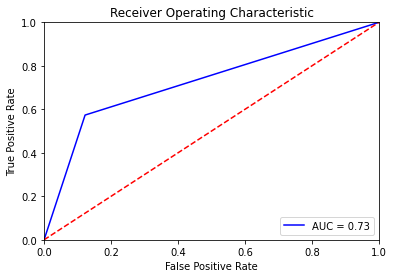

Confidence interval for the score: [0.710 - 0.74]


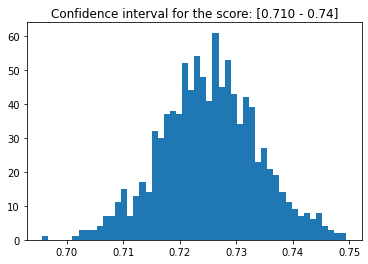

[[1669  233]
 [ 379  510]]
Precision is 0.7506739332730484 
Recall is 0.7255878307009731 
Fscore is 0.7350316455696202 
Support is None 
AUC is 0.7255878307009731


<Figure size 432x288 with 0 Axes>

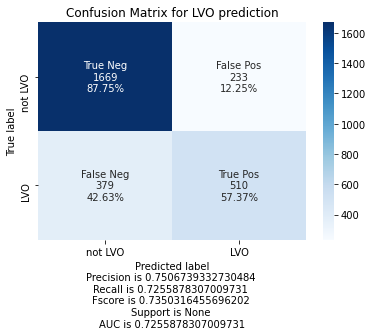

$$$$$$$$$$$$$$$$$$$$$$$$   Enc:SumEncoder   $$$$$$$$$$$$$$$$$$$$$$$
leftover columns are
['atrialFibrillation', 'NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS3', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS8', 'NIHSS9', 'NIHSS10', 'NIHSS11']
Index(['atrialFibrillation'], dtype='object')
[False  True]
leftover columns are
['atrialFibrillation', 'NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS3', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS8', 'NIHSS9', 'NIHSS10', 'NIHSS11']
check test 8
############### Model: rf ###############
current grid used is: 
{'n_estimators': [30, 50], 'max_depth': [10, 15, 20]}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.49880146980285645 minutes
Best: 0.772287 using {'max_depth': 10, 'n_estimators': 50}
0.767628 (0.006084) with: {'max_depth': 10, 'n_estimators': 30}
0.772287 (0.004421) with: {'max_depth': 10, 'n_estimators': 50}
0.762428 (0.004884) with: {'max_depth': 15, 'n_estimators': 30}
0.758119 (0.004719) with: {'max_depth': 15, 'n_estimators': 50}
0.751288 (0.001184) with: {'max_depth': 20, 'n_estimators': 30}
0.754532 (0.003367) with: {'max_depth': 20, 'n_estimators': 50}
Precision is [0.81818182 0.67926988] 
Recall is [0.87066246 0.58605174] 
Fscore is [0.84360672 0.62922705] 
Support is [1902  889] 
AUC is 0.728357102049941
{'max_depth': 10, 'n_estimators': 50}
current grid used is: 
{'n_estimators': [50], 'max_depth': [10], 'bootstrap': [True, False], 'max_features': [5, 8, None]}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.5628235340118408 minutes
Best: 0.770668 using {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 50}
0.770668 (0.003837) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 50}
0.769496 (0.003311) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'n_estimators': 50}
0.767637 (0.005679) with: {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'n_estimators': 50}
0.767617 (0.004528) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 5, 'n_estimators': 50}
0.766963 (0.006068) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 8, 'n_estimators': 50}
0.755246 (0.006527) with: {'bootstrap': False, 'max_depth': 10, 'max_features': None, 'n_estimators': 50}
Precision is [0.81418093 0.68230563] 
Recall is [0.87539432 0.57255343] 
Fscore is [0.84367874 0.62262997] 
Support is [1902  889] 
AUC is 0.7239738762938545
{'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 50}
cur

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.5516884326934814 minutes
Best: 0.772463 using {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}
0.770304 (0.005677) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 50}
0.772463 (0.004320) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}
0.772043 (0.002841) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 50}
0.770238 (0.003117) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}
Precision is [0.81831538 0.69158879] 
Recall is [0.8785489  0.58267717] 
Fscore is [0.84736308 0.63247863] 
Support is [1902  889] 
AUC is 0.730613030626692
{'bootstrap': True, 'max_depth': 10, 'max_features': 

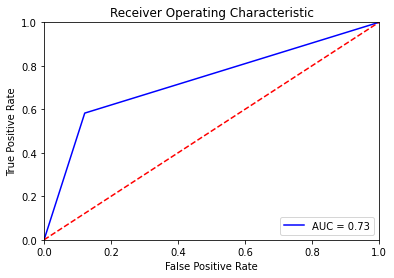

Confidence interval for the score: [0.716 - 0.745]


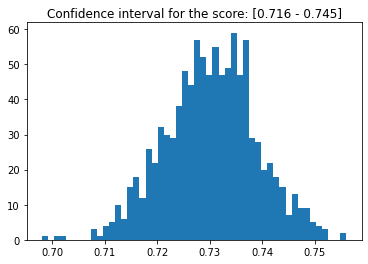

[[1671  231]
 [ 371  518]]
Precision is 0.7549520810640109 
Recall is 0.7306130306266921 
Fscore is 0.7399208578214663 
Support is None 
AUC is 0.730613030626692


<Figure size 432x288 with 0 Axes>

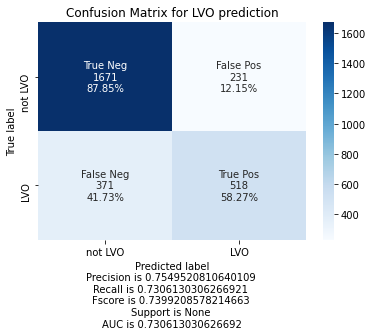

$$$$$$$$$$$$$$$$$$$$$$$$   Enc:WOEEncoder   $$$$$$$$$$$$$$$$$$$$$$$
leftover columns are
['atrialFibrillation', 'NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS3', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS8', 'NIHSS9', 'NIHSS10', 'NIHSS11']
Index(['atrialFibrillation'], dtype='object')
[False  True]
leftover columns are
['atrialFibrillation', 'NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS3', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS8', 'NIHSS9', 'NIHSS10', 'NIHSS11']
check test 8
############### Model: rf ###############
current grid used is: 
{'n_estimators': [30, 50], 'max_depth': [10, 15, 20]}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.428786039352417 minutes
Best: 0.771531 using {'max_depth': 10, 'n_estimators': 50}
0.769775 (0.004583) with: {'max_depth': 10, 'n_estimators': 30}
0.771531 (0.003791) with: {'max_depth': 10, 'n_estimators': 50}
0.762349 (0.004388) with: {'max_depth': 15, 'n_estimators': 30}
0.763509 (0.004581) with: {'max_depth': 15, 'n_estimators': 50}
0.753563 (0.007375) with: {'max_depth': 20, 'n_estimators': 30}
0.754772 (0.002810) with: {'max_depth': 20, 'n_estimators': 50}
Precision is [0.81625616 0.67805519] 
Recall is [0.87118822 0.58042745] 
Fscore is [0.84282808 0.62545455] 
Support is [1902  889] 
AUC is 0.7258078347462087
{'max_depth': 10, 'n_estimators': 50}
current grid used is: 
{'n_estimators': [50], 'max_depth': [10], 'bootstrap': [True, False], 'max_features': [5, 8, None]}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.5901656150817871 minutes
Best: 0.770433 using {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 50}
0.770433 (0.006347) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 50}
0.769704 (0.003563) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'n_estimators': 50}
0.766530 (0.003792) with: {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'n_estimators': 50}
0.767996 (0.003511) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 5, 'n_estimators': 50}
0.767583 (0.005236) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 8, 'n_estimators': 50}
0.755608 (0.007200) with: {'bootstrap': False, 'max_depth': 10, 'max_features': None, 'n_estimators': 50}
Precision is [0.81576355 0.67674113] 
Recall is [0.87066246 0.57930259] 
Fscore is [0.84231943 0.62424242] 
Support is [1902  889] 
AUC is 0.7249825238722131
{'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 50}
cur

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.566892147064209 minutes
Best: 0.771874 using {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}
0.771091 (0.002223) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 50}
0.771874 (0.003033) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}
0.771555 (0.004809) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 50}
0.771618 (0.004644) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}
Precision is [0.81635651 0.68624833] 
Recall is [0.87644585 0.57817773] 
Fscore is [0.84533469 0.62759463] 
Support is [1902  889] 
AUC is 0.7273117871307095
{'bootstrap': True, 'max_depth': 10, 'max_features': 

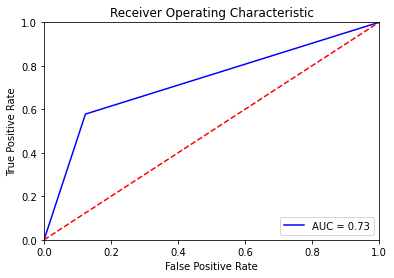

Confidence interval for the score: [0.713 - 0.741]


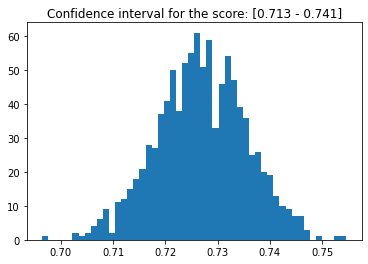

[[1667  235]
 [ 375  514]]
Precision is 0.7513024221652376 
Recall is 0.7273117871307095 
Fscore is 0.7364646565965025 
Support is None 
AUC is 0.7273117871307095


<Figure size 432x288 with 0 Axes>

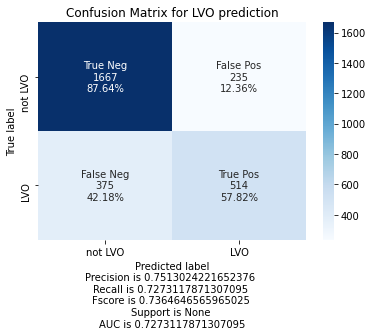

@@@@@@@@@@@@@@@@@@@@@@   ScoreFunction:<function mutual_info_classif at 0x7fbddf896560>   @@@@@@@@@@@@@@@@@@@@@
$$$$$$$$$$$$$$$$$$$$$$$$   Enc:HelmertEncoder   $$$$$$$$$$$$$$$$$$$$$$$


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


leftover columns are
['atrialFibrillation', 'age', 'NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS8', 'NIHSS9', 'NIHSS10', 'NIHSS11']
Index(['atrialFibrillation'], dtype='object')
[False  True]
leftover columns are
['atrialFibrillation', 'age', 'NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS8', 'NIHSS9', 'NIHSS10', 'NIHSS11']
check test 8
############### Model: rf ###############
current grid used is: 
{'n_estimators': [30, 50], 'max_depth': [10, 15, 20]}


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.7290456295013428 minutes
Best: 0.775325 using {'max_depth': 10, 'n_estimators': 50}
0.773754 (0.003379) with: {'max_depth': 10, 'n_estimators': 30}
0.775325 (0.001187) with: {'max_depth': 10, 'n_estimators': 50}
0.764931 (0.004624) with: {'max_depth': 15, 'n_estimators': 30}
0.767855 (0.002618) with: {'max_depth': 15, 'n_estimators': 50}
0.760612 (0.004209) with: {'max_depth': 20, 'n_estimators': 30}
0.762959 (0.004277) with: {'max_depth': 20, 'n_estimators': 50}
Precision is [0.81858626 0.6796875 ] 
Recall is [0.87066246 0.5871766 ] 
Fscore is [0.84382166 0.63005432] 
Support is [1902  889] 
AUC is 0.7289195317462289
{'max_depth': 10, 'n_estimators': 50}
current grid used is: 
{'n_estimators': [50], 'max_depth': [10], 'bootstrap': [True, False], 'max_features': [5, 8, None]}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.8752748966217041 minutes
Best: 0.775643 using {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 50}
0.775643 (0.005907) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 50}
0.772269 (0.002425) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'n_estimators': 50}
0.774169 (0.002232) with: {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'n_estimators': 50}
0.773835 (0.001337) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 5, 'n_estimators': 50}
0.771791 (0.003167) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 8, 'n_estimators': 50}
0.749924 (0.005129) with: {'bootstrap': False, 'max_depth': 10, 'max_features': None, 'n_estimators': 50}
Precision is [0.816609   0.67447917] 
Recall is [0.86855941 0.58267717] 
Fscore is [0.84178344 0.62522631] 
Support is [1902  889] 
AUC is 0.7256182882502463
{'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 50}
cur

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.828972578048706 minutes
Best: 0.776203 using {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}
0.775781 (0.002284) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 50}
0.775422 (0.002293) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}
0.773812 (0.002037) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 50}
0.776203 (0.003627) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}
Precision is [0.81706719 0.68617021] 
Recall is [0.87592008 0.58042745] 
Fscore is [0.84547069 0.62888483] 
Support is [1902  889] 
AUC is 0.7281737653455779
{'bootstrap': True, 'max_depth': 10, 'max_features':

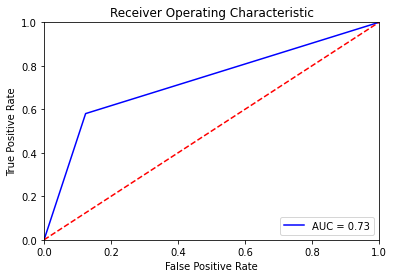

Confidence interval for the score: [0.713 - 0.742]


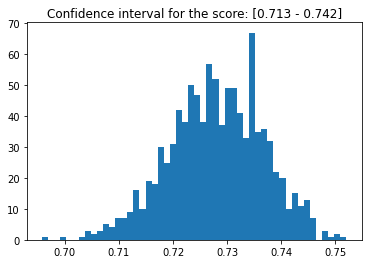

[[1666  236]
 [ 373  516]]
Precision is 0.7516187012824392 
Recall is 0.7281737653455779 
Fscore is 0.7371777595214979 
Support is None 
AUC is 0.7281737653455779


<Figure size 432x288 with 0 Axes>

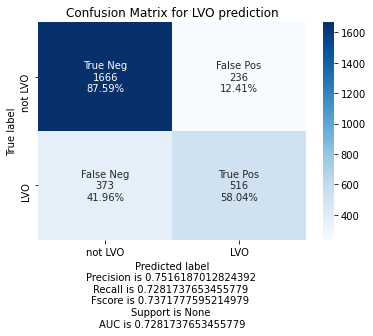

$$$$$$$$$$$$$$$$$$$$$$$$   Enc:OrdinalEncoder   $$$$$$$$$$$$$$$$$$$$$$$


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


leftover columns are
['atrialFibrillation', 'NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS3', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS8', 'NIHSS9', 'NIHSS10', 'NIHSS11']
Index(['atrialFibrillation'], dtype='object')
[False  True]
leftover columns are
['atrialFibrillation', 'NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS3', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS8', 'NIHSS9', 'NIHSS10', 'NIHSS11']
check test 8
############### Model: rf ###############
current grid used is: 
{'n_estimators': [30, 50], 'max_depth': [10, 15, 20]}


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.2714676856994629 minutes
Best: 0.771197 using {'max_depth': 10, 'n_estimators': 30}
0.771197 (0.003481) with: {'max_depth': 10, 'n_estimators': 30}
0.771100 (0.005011) with: {'max_depth': 10, 'n_estimators': 50}
0.763155 (0.003471) with: {'max_depth': 15, 'n_estimators': 30}
0.761600 (0.002207) with: {'max_depth': 15, 'n_estimators': 50}
0.753166 (0.007050) with: {'max_depth': 20, 'n_estimators': 30}
0.754407 (0.003064) with: {'max_depth': 20, 'n_estimators': 50}
Precision is [0.81849484 0.68601583] 
Recall is [0.87486856 0.58492688] 
Fscore is [0.84574333 0.63145112] 
Support is [1902  889] 
AUC is 0.7298977217753144
{'max_depth': 10, 'n_estimators': 30}
current grid used is: 
{'n_estimators': [30], 'max_depth': [10], 'bootstrap': [True, False], 'max_features': [5, 8, None]}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.3616766929626465 minutes
Best: 0.769873 using {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 30}
0.769873 (0.004427) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 30}
0.767637 (0.002917) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'n_estimators': 30}
0.763881 (0.004895) with: {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'n_estimators': 30}
0.767060 (0.007485) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 5, 'n_estimators': 30}
0.764359 (0.004054) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 8, 'n_estimators': 30}
0.755023 (0.007508) with: {'bootstrap': False, 'max_depth': 10, 'max_features': None, 'n_estimators': 30}
Precision is [0.81965602 0.69047619] 
Recall is [0.87697161 0.5871766 ] 
Fscore is [0.84734569 0.63465046] 
Support is [1902  889] 
AUC is 0.7320741058787211
{'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 30}
cur

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.33490777015686035 minutes
Best: 0.771183 using {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 30}
0.770601 (0.004823) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 30}
0.768441 (0.002652) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 30}
0.770712 (0.003398) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 30}
0.771183 (0.001476) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 30}
Precision is [0.82041217 0.69455511] 
Recall is [0.87907466 0.58830146] 
Fscore is [0.84873096 0.63702801] 
Support is [1902  889] 
AUC is 0.7336880602858397
{'bootstrap': True, 'max_depth': 10, 'max_features

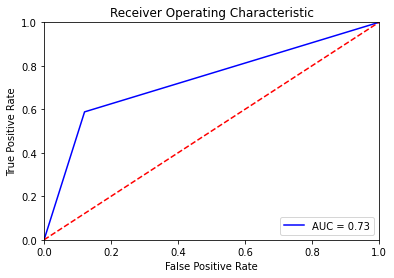

Confidence interval for the score: [0.719 - 0.747]


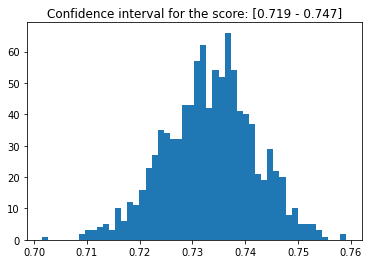

[[1672  230]
 [ 366  523]]
Precision is 0.7574836408373702 
Recall is 0.7336880602858397 
Fscore is 0.7428794895416633 
Support is None 
AUC is 0.7336880602858397


<Figure size 432x288 with 0 Axes>

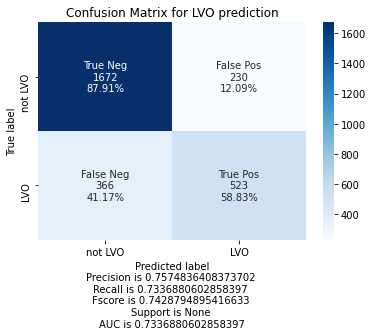

$$$$$$$$$$$$$$$$$$$$$$$$   Enc:SumEncoder   $$$$$$$$$$$$$$$$$$$$$$$


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


leftover columns are
['atrialFibrillation', 'NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS8', 'NIHSS9', 'NIHSS10', 'NIHSS11', 'preThrombolysisPressure']
Index(['atrialFibrillation'], dtype='object')
[False  True]
leftover columns are
['atrialFibrillation', 'NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS8', 'NIHSS9', 'NIHSS10', 'NIHSS11', 'preThrombolysisPressure']
check test 8
############### Model: rf ###############
current grid used is: 
{'n_estimators': [30, 50], 'max_depth': [10, 15, 20]}


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.7594006061553955 minutes
Best: 0.773472 using {'max_depth': 10, 'n_estimators': 50}
0.773168 (0.004129) with: {'max_depth': 10, 'n_estimators': 30}
0.773472 (0.004502) with: {'max_depth': 10, 'n_estimators': 50}
0.768347 (0.008188) with: {'max_depth': 15, 'n_estimators': 30}
0.767284 (0.008751) with: {'max_depth': 15, 'n_estimators': 50}
0.760627 (0.007159) with: {'max_depth': 20, 'n_estimators': 30}
0.764378 (0.006941) with: {'max_depth': 20, 'n_estimators': 50}
Precision is [0.8129285  0.67690254] 
Recall is [0.87276551 0.57030371] 
Fscore is [0.84178499 0.61904762] 
Support is [1902  889] 
AUC is 0.7215346110127402
{'max_depth': 10, 'n_estimators': 50}
current grid used is: 
{'n_estimators': [50], 'max_depth': [10], 'bootstrap': [True, False], 'max_features': [5, 8, None]}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 1.294553518295288 minutes
Best: 0.774058 using {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'n_estimators': 50}
0.773565 (0.006758) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 50}
0.774058 (0.005484) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'n_estimators': 50}
0.770304 (0.003410) with: {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'n_estimators': 50}
0.771967 (0.006901) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 5, 'n_estimators': 50}
0.771388 (0.005279) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 8, 'n_estimators': 50}
0.756632 (0.005596) with: {'bootstrap': False, 'max_depth': 10, 'max_features': None, 'n_estimators': 50}
Precision is [0.81470442 0.66323907] 
Recall is [0.86225026 0.58042745] 
Fscore is [0.83780332 0.61907618] 
Support is [1902  889] 
AUC is 0.7213388547251782
{'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'n_estimators': 50}
curr

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 1.2501447200775146 minutes
Best: 0.774963 using {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}
0.772854 (0.004794) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 50}
0.773316 (0.003008) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}
0.773868 (0.004151) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 50}
0.774963 (0.002667) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}
Precision is [0.80992141 0.66490066] 
Recall is [0.86698212 0.56467942] 
Fscore is [0.83748095 0.6107056 ] 
Support is [1902  889] 
AUC is 0.7158307695765158
{'bootstrap': True, 'max_depth': 10, 'max_features'

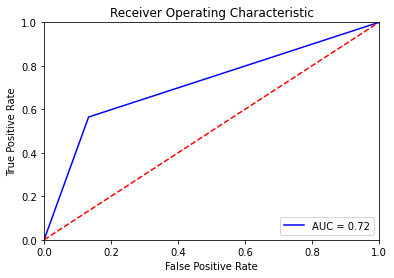

Confidence interval for the score: [0.701 - 0.73]


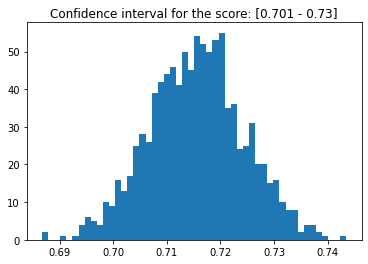

[[1649  253]
 [ 387  502]]
Precision is 0.737411038394983 
Recall is 0.7158307695765158 
Fscore is 0.7240932754532233 
Support is None 
AUC is 0.7158307695765158


<Figure size 432x288 with 0 Axes>

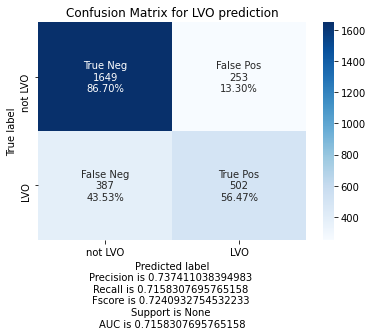

$$$$$$$$$$$$$$$$$$$$$$$$   Enc:WOEEncoder   $$$$$$$$$$$$$$$$$$$$$$$


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


leftover columns are
['atrialFibrillation', 'NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS3', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS8', 'NIHSS9', 'NIHSS10', 'NIHSS11']
Index(['atrialFibrillation'], dtype='object')
[False  True]
leftover columns are
['atrialFibrillation', 'NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS3', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS8', 'NIHSS9', 'NIHSS10', 'NIHSS11']
check test 8
############### Model: rf ###############
current grid used is: 
{'n_estimators': [30, 50], 'max_depth': [10, 15, 20]}


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.4407672882080078 minutes
Best: 0.771488 using {'max_depth': 10, 'n_estimators': 50}
0.769414 (0.003445) with: {'max_depth': 10, 'n_estimators': 30}
0.771488 (0.005604) with: {'max_depth': 10, 'n_estimators': 50}
0.761311 (0.003835) with: {'max_depth': 15, 'n_estimators': 30}
0.760137 (0.005288) with: {'max_depth': 15, 'n_estimators': 50}
0.751128 (0.002124) with: {'max_depth': 20, 'n_estimators': 30}
0.756726 (0.004610) with: {'max_depth': 20, 'n_estimators': 50}
Precision is [0.81546745 0.68449198] 
Recall is [0.87592008 0.57592801] 
Fscore is [0.84461343 0.62553451] 
Support is [1902  889] 
AUC is 0.725924046560426
{'max_depth': 10, 'n_estimators': 50}
current grid used is: 
{'n_estimators': [50], 'max_depth': [10], 'bootstrap': [True, False], 'max_features': [5, 8, None]}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.5942416191101074 minutes
Best: 0.770312 using {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 50}
0.770312 (0.002357) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 50}
0.767340 (0.004474) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'n_estimators': 50}
0.766241 (0.004763) with: {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'n_estimators': 50}
0.770165 (0.005086) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 5, 'n_estimators': 50}
0.766047 (0.005157) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 8, 'n_estimators': 50}
0.755749 (0.006414) with: {'bootstrap': False, 'max_depth': 10, 'max_features': None, 'n_estimators': 50}
Precision is [0.81751107 0.68337731] 
Recall is [0.87381703 0.58267717] 
Fscore is [0.84472681 0.62902247] 
Support is [1902  889] 
AUC is 0.728247100027323
{'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 50}
curr

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.5586097240447998 minutes
Best: 0.771455 using {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 50}
0.770891 (0.002737) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 50}
0.770025 (0.002595) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}
0.771455 (0.004413) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 50}
0.768972 (0.004849) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}
Precision is [0.81635651 0.68624833] 
Recall is [0.87644585 0.57817773] 
Fscore is [0.84533469 0.62759463] 
Support is [1902  889] 
AUC is 0.7273117871307095
{'bootstrap': True, 'max_depth': 10, 'max_features':

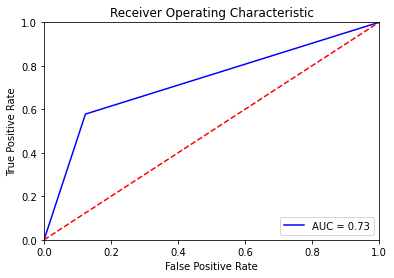

Confidence interval for the score: [0.713 - 0.741]


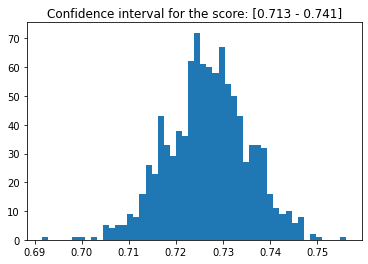

[[1667  235]
 [ 375  514]]
Precision is 0.7513024221652376 
Recall is 0.7273117871307095 
Fscore is 0.7364646565965025 
Support is None 
AUC is 0.7273117871307095


<Figure size 432x288 with 0 Axes>

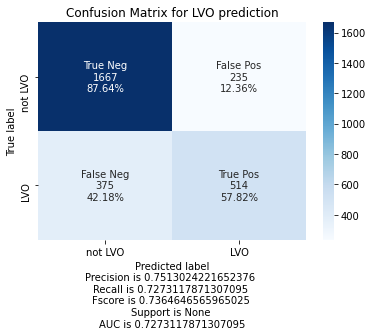

@@@@@@@@@@@@@@@@@@@@@@   ScoreFunction:<function f_regression at 0x7fbddfd410e0>   @@@@@@@@@@@@@@@@@@@@@
$$$$$$$$$$$$$$$$$$$$$$$$   Enc:HelmertEncoder   $$$$$$$$$$$$$$$$$$$$$$$
leftover columns are
['atrialFibrillation', 'NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS3', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS8', 'NIHSS9', 'NIHSS10', 'NIHSS11']
Index(['atrialFibrillation'], dtype='object')
[False  True]
leftover columns are
['atrialFibrillation', 'NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS3', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS8', 'NIHSS9', 'NIHSS10', 'NIHSS11']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


check test 8
############### Model: rf ###############
current grid used is: 
{'n_estimators': [30, 50], 'max_depth': [10, 15, 20]}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.30249643325805664 minutes
Best: 0.771681 using {'max_depth': 10, 'n_estimators': 30}
0.771681 (0.005566) with: {'max_depth': 10, 'n_estimators': 30}
0.771348 (0.005436) with: {'max_depth': 10, 'n_estimators': 50}
0.760568 (0.005029) with: {'max_depth': 15, 'n_estimators': 30}
0.757679 (0.003228) with: {'max_depth': 15, 'n_estimators': 50}
0.749522 (0.004572) with: {'max_depth': 20, 'n_estimators': 30}
0.755295 (0.004134) with: {'max_depth': 20, 'n_estimators': 50}
Precision is [0.81742126 0.68247694] 
Recall is [0.87329127 0.58267717] 
Fscore is [0.84443315 0.62864078] 
Support is [1902  889] 
AUC is 0.7279842188496154
{'max_depth': 10, 'n_estimators': 30}
current grid used is: 
{'n_estimators': [30], 'max_depth': [10], 'bootstrap': [True, False], 'max_features': [5, 8, None]}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.3470606803894043 minutes
Best: 0.770819 using {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 30}
0.770819 (0.005526) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 30}
0.767197 (0.001707) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'n_estimators': 30}
0.767973 (0.005955) with: {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'n_estimators': 30}
0.767387 (0.004790) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 5, 'n_estimators': 30}
0.766389 (0.003791) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 8, 'n_estimators': 30}
0.755343 (0.007101) with: {'bootstrap': False, 'max_depth': 10, 'max_features': None, 'n_estimators': 30}
Precision is [0.81527094 0.67542707] 
Recall is [0.8701367  0.57817773] 
Fscore is [0.84181078 0.6230303 ] 
Support is [1902  889] 
AUC is 0.7241572129982176
{'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 30}
cur

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.3373689651489258 minutes
Best: 0.772061 using {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 30}
0.770325 (0.003414) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 30}
0.772061 (0.004273) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 30}
0.771524 (0.003651) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 30}
0.770940 (0.003751) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 30}
Precision is [0.81818182 0.68650794] 
Recall is [0.87539432 0.58380202] 
Fscore is [0.84582169 0.63100304] 
Support is [1902  889] 
AUC is 0.7295981732567342
{'bootstrap': True, 'max_depth': 10, 'max_features':

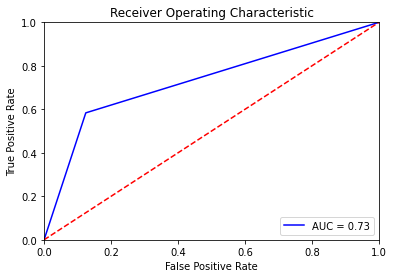

Confidence interval for the score: [0.715 - 0.744]


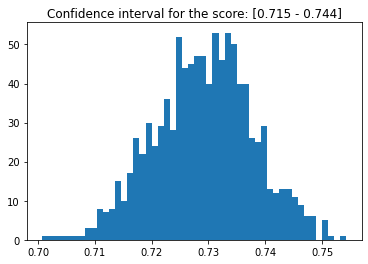

[[1665  237]
 [ 370  519]]
Precision is 0.7523448773448773 
Recall is 0.729598173256734 
Fscore is 0.7384123655785306 
Support is None 
AUC is 0.7295981732567342


<Figure size 432x288 with 0 Axes>

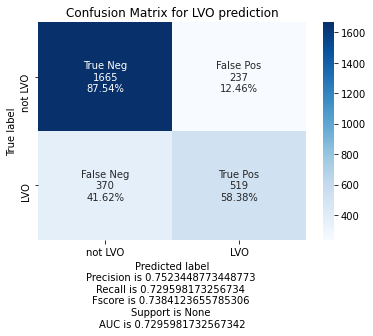

$$$$$$$$$$$$$$$$$$$$$$$$   Enc:OrdinalEncoder   $$$$$$$$$$$$$$$$$$$$$$$
leftover columns are
['atrialFibrillation', 'NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS3', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS8', 'NIHSS9', 'NIHSS10', 'NIHSS11']
Index(['atrialFibrillation'], dtype='object')
[False  True]
leftover columns are
['atrialFibrillation', 'NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS3', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS8', 'NIHSS9', 'NIHSS10', 'NIHSS11']
check test 8
############### Model: rf ###############
current grid used is: 
{'n_estimators': [30, 50], 'max_depth': [10, 15, 20]}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.26969289779663086 minutes
Best: 0.771153 using {'max_depth': 10, 'n_estimators': 30}
0.771153 (0.001330) with: {'max_depth': 10, 'n_estimators': 30}
0.769751 (0.002876) with: {'max_depth': 10, 'n_estimators': 50}
0.759598 (0.004415) with: {'max_depth': 15, 'n_estimators': 30}
0.759014 (0.003163) with: {'max_depth': 15, 'n_estimators': 50}
0.753604 (0.002396) with: {'max_depth': 20, 'n_estimators': 30}
0.755621 (0.002618) with: {'max_depth': 20, 'n_estimators': 50}
Precision is [0.81706114 0.67889908] 
Recall is [0.87118822 0.58267717] 
Fscore is [0.843257   0.62711864] 
Support is [1902  889] 
AUC is 0.7269326941387847
{'max_depth': 10, 'n_estimators': 30}
current grid used is: 
{'n_estimators': [30], 'max_depth': [10], 'bootstrap': [True, False], 'max_features': [5, 8, None]}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.3611156940460205 minutes
Best: 0.768440 using {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 30}
0.768440 (0.004252) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 30}
0.768235 (0.004877) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'n_estimators': 30}
0.765832 (0.005331) with: {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'n_estimators': 30}
0.766959 (0.004473) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 5, 'n_estimators': 30}
0.766004 (0.006194) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 8, 'n_estimators': 30}
0.754975 (0.007493) with: {'bootstrap': False, 'max_depth': 10, 'max_features': None, 'n_estimators': 30}
Precision is [0.81692232 0.67402597] 
Recall is [0.86803365 0.58380202] 
Fscore is [0.84170278 0.62567812] 
Support is [1902  889] 
AUC is 0.7259178367688266
{'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 30}
cur

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.3465158939361572 minutes
Best: 0.770799 using {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 30}
0.768526 (0.002560) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 30}
0.768457 (0.007179) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 30}
0.770556 (0.004213) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 30}
0.770799 (0.001170) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 30}
Precision is [0.81769042 0.68518519] 
Recall is [0.87486856 0.58267717] 
Fscore is [0.84531369 0.62978723] 
Support is [1902  889] 
AUC is 0.7287728623827383
{'bootstrap': True, 'max_depth': 10, 'max_features'

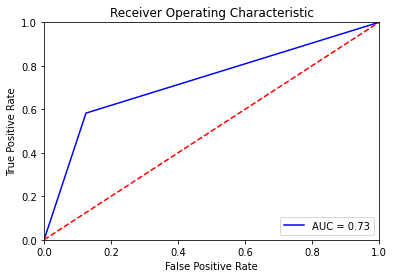

Confidence interval for the score: [0.714 - 0.743]


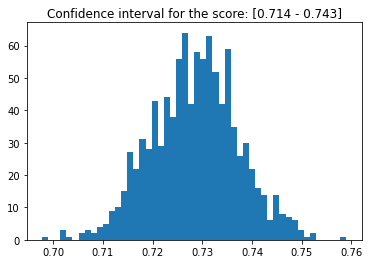

[[1664  238]
 [ 371  518]]
Precision is 0.7514378014378015 
Recall is 0.7287728623827384 
Fscore is 0.7375504623349672 
Support is None 
AUC is 0.7287728623827383


<Figure size 432x288 with 0 Axes>

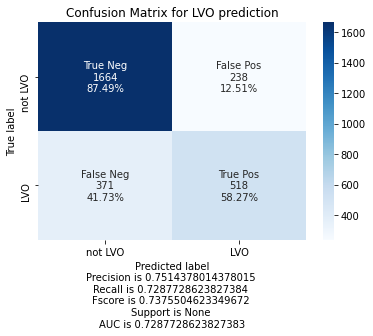

$$$$$$$$$$$$$$$$$$$$$$$$   Enc:SumEncoder   $$$$$$$$$$$$$$$$$$$$$$$
leftover columns are
['atrialFibrillation', 'NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS3', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS8', 'NIHSS9', 'NIHSS10', 'NIHSS11']
Index(['atrialFibrillation'], dtype='object')
[False  True]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):



leftover columns are
['atrialFibrillation', 'NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS3', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS8', 'NIHSS9', 'NIHSS10', 'NIHSS11']
check test 8
############### Model: rf ###############
current grid used is: 
{'n_estimators': [30, 50], 'max_depth': [10, 15, 20]}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.30231618881225586 minutes
Best: 0.770768 using {'max_depth': 10, 'n_estimators': 30}
0.770768 (0.006169) with: {'max_depth': 10, 'n_estimators': 30}
0.768667 (0.004023) with: {'max_depth': 10, 'n_estimators': 50}
0.758980 (0.001180) with: {'max_depth': 15, 'n_estimators': 30}
0.759684 (0.004106) with: {'max_depth': 15, 'n_estimators': 50}
0.751840 (0.000823) with: {'max_depth': 20, 'n_estimators': 30}
0.752302 (0.002706) with: {'max_depth': 20, 'n_estimators': 50}
Precision is [0.81692913 0.68115942] 
Recall is [0.87276551 0.58155231] 
Fscore is [0.84392476 0.62742718] 
Support is [1902  889] 
AUC is 0.7271589079756199
{'max_depth': 10, 'n_estimators': 30}
current grid used is: 
{'n_estimators': [30], 'max_depth': [10], 'bootstrap': [True, False], 'max_features': [5, 8, None]}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.45302557945251465 minutes
Best: 0.769983 using {'bootstrap': False, 'max_depth': 10, 'max_features': 5, 'n_estimators': 30}
0.768010 (0.006293) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 30}
0.767396 (0.003290) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'n_estimators': 30}
0.764940 (0.002016) with: {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'n_estimators': 30}
0.769983 (0.006440) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 5, 'n_estimators': 30}
0.765035 (0.005135) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 8, 'n_estimators': 30}
0.755949 (0.006832) with: {'bootstrap': False, 'max_depth': 10, 'max_features': None, 'n_estimators': 30}
Precision is [0.8133268  0.67733333] 
Recall is [0.87276551 0.57142857] 
Fscore is [0.84199848 0.61989018] 
Support is [1902  889] 
AUC is 0.7220970407090281
{'bootstrap': False, 'max_depth': 10, 'max_features': 5, 'n_estimators': 30}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.44573163986206055 minutes
Best: 0.770598 using {'bootstrap': False, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 30}
0.769856 (0.004991) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 30}
0.770598 (0.002514) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 30}
0.769931 (0.005672) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 30}
0.769578 (0.003771) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 30}
Precision is [0.82100592 0.68938401] 
Recall is [0.87539432 0.59167604] 
Fscore is [0.84732824 0.63680387] 
Support is [1902  889] 
AUC is 0.7335351811307498
{'bootstrap': False, 'max_depth': 10, 'max_fea

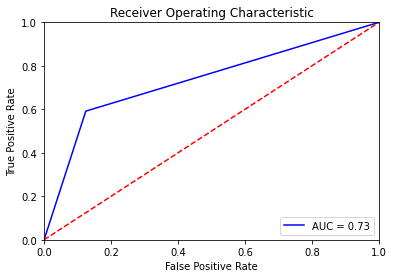

Confidence interval for the score: [0.719 - 0.748]


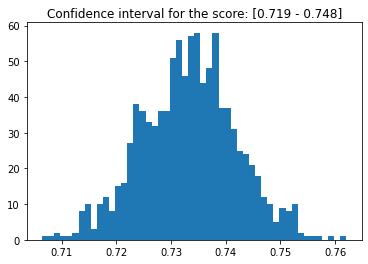

[[1665  237]
 [ 363  526]]
Precision is 0.7551949638223456 
Recall is 0.7335351811307498 
Fscore is 0.7420660591834094 
Support is None 
AUC is 0.7335351811307498


<Figure size 432x288 with 0 Axes>

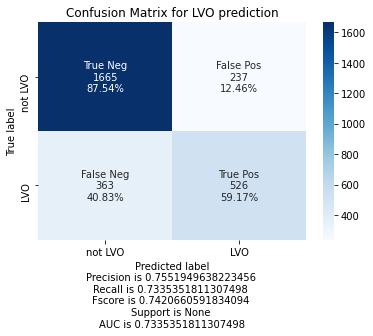

$$$$$$$$$$$$$$$$$$$$$$$$   Enc:WOEEncoder   $$$$$$$$$$$$$$$$$$$$$$$
leftover columns are
['atrialFibrillation', 'NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS3', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS8', 'NIHSS9', 'NIHSS10', 'NIHSS11']
Index(['atrialFibrillation'], dtype='object')
[False  True]
leftover columns are
['atrialFibrillation', 'NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS3', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS8', 'NIHSS9', 'NIHSS10', 'NIHSS11']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


check test 8
############### Model: rf ###############
current grid used is: 
{'n_estimators': [30, 50], 'max_depth': [10, 15, 20]}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.27200794219970703 minutes
Best: 0.770615 using {'max_depth': 10, 'n_estimators': 30}
0.770615 (0.001977) with: {'max_depth': 10, 'n_estimators': 30}
0.769370 (0.003335) with: {'max_depth': 10, 'n_estimators': 50}
0.762476 (0.002140) with: {'max_depth': 15, 'n_estimators': 30}
0.762228 (0.004493) with: {'max_depth': 15, 'n_estimators': 50}
0.750669 (0.001640) with: {'max_depth': 20, 'n_estimators': 30}
0.751853 (0.004018) with: {'max_depth': 20, 'n_estimators': 50}
Precision is [0.81724645 0.688     ] 
Recall is [0.87697161 0.58042745] 
Fscore is [0.8460563  0.62965223] 
Support is [1902  889] 
AUC is 0.7286995277009931
{'max_depth': 10, 'n_estimators': 30}
current grid used is: 
{'n_estimators': [30], 'max_depth': [10], 'bootstrap': [True, False], 'max_features': [5, 8, None]}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.3652331829071045 minutes
Best: 0.769870 using {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 30}
0.769870 (0.001946) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 30}
0.768095 (0.004335) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'n_estimators': 30}
0.765852 (0.004583) with: {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'n_estimators': 30}
0.767015 (0.004230) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 5, 'n_estimators': 30}
0.767035 (0.005777) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 8, 'n_estimators': 30}
0.755804 (0.006700) with: {'bootstrap': False, 'max_depth': 10, 'max_features': None, 'n_estimators': 30}
Precision is [0.81483301 0.6781457 ] 
Recall is [0.87223975 0.57592801] 
Fscore is [0.84255967 0.62287105] 
Support is [1902  889] 
AUC is 0.7240838783164724
{'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 30}
cur

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.348538875579834 minutes
Best: 0.771389 using {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 30}
0.769970 (0.002741) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 30}
0.771389 (0.002718) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 30}
0.771139 (0.004609) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 30}
0.769589 (0.005506) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 30}
Precision is [0.81961557 0.68635171] 
Recall is [0.8743428  0.58830146] 
Fscore is [0.84609514 0.63355542] 
Support is [1902  889] 
AUC is 0.7313221296864706
{'bootstrap': True, 'max_depth': 10, 'max_features': 

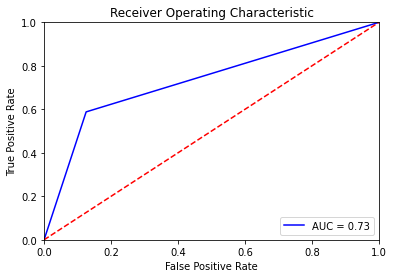

Confidence interval for the score: [0.717 - 0.745]


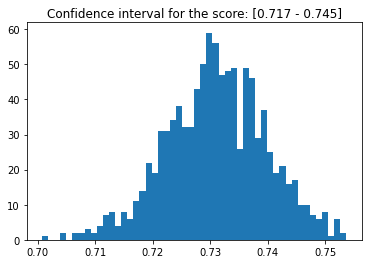

[[1663  239]
 [ 366  523]]
Precision is 0.7529836401056078 
Recall is 0.7313221296864706 
Fscore is 0.7398252810712223 
Support is None 
AUC is 0.7313221296864706


<Figure size 432x288 with 0 Axes>

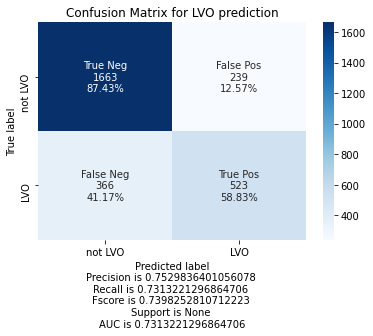

'\nw/o resample \n\n Enc:WOEEncoder + rf + f_regression\nPrecision is 0.754037598729604 \nRecall is 0.7040906524839553 \nFscore is 0.7209070584477802 \nSupport is None \nAUC is 0.7040906524839554\n\n\nw/ resample\nlr + Enc:OrdinalEncoder + f_classif\nPrecision is 0.7240856738735097 \nRecall is 0.7491921945566913 \nFscore is 0.7333033718496091 \nSupport is None \nAUC is 0.7491921945566912\n[[972 230]\n [139 309]]\n'

In [45]:
import category_encoders as ce


saveFile = False
debugMode = False
models = ['rf']

# select encoding type
encs = [
      # 'BackwardDifferenceEncoder',
      # ce.BinaryEncoder(),
      # ce.CatBoostEncoder(),
      # ce.GLMMEncoder(),
      # ce.HashingEncoder(),
      'HelmertEncoder',
      # ce.JamesSteinEncoder(),
      # ce.LeaveOneOutEncoder(),
      # ce.MEstimateEncoder(),
      # ce.OneHotEncoder(),
      'OrdinalEncoder',
      'SumEncoder',
      # ce.PolynomialEncoder(),
      # ce.TargetEncoder(),
      'WOEEncoder'
]

# select score function for feature selection
scoreFunctions=[
      'f_classif',    #(0.791)
      'mutual_info_classif', #(~0.798 * 5)
      # 'chi2',  #(~0.776 * 5)
      'f_regression', #(~0.792 * 5)
      # 'mutual_info_regression' #(0.78*3， 0.793*2) 
]

auc = runAll(models, encs=encs, scoreFunctions=scoreFunctions)

print("^^^^^^final AUC is ^^^^^^^^^^^^^")
print(auc)


"""
w/o resample 

 Enc:WOEEncoder + rf + f_regression
Precision is 0.754037598729604 
Recall is 0.7040906524839553 
Fscore is 0.7209070584477802 
Support is None 
AUC is 0.7040906524839554


w/ resample
lr + Enc:OrdinalEncoder + f_classif
Precision is 0.7240856738735097 
Recall is 0.7491921945566913 
Fscore is 0.7333033718496091 
Support is None 
AUC is 0.7491921945566912
[[972 230]
 [139 309]]
"""

# Run all tmp

@@@@@@@@@@@@@@@@@@@@@@   ScoreFunction:<function f_classif at 0x7fbddfd3cd40>   @@@@@@@@@@@@@@@@@@@@@
$$$$$$$$$$$$$$$$$$$$$$$$   Enc:BackwardDifferenceEncoder   $$$$$$$$$$$$$$$$$$$$$$$
leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS9', 'NIHSS10']
[False  True]
leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS9', 'NIHSS10']
check test 8
############### Model: lr ###############
current grid used is: 
{'C': [0.001, 0.01, 0.1], 'penalty': ['l1', 'l2']}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Execution time is 0.0530850887298584 minutes
Best: 0.755351 using {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.001, 'penalty': 'l1'}
0.742792 (0.003951) with: {'C': 0.001, 'penalty': 'l2'}
nan (nan) with: {'C': 0.01, 'penalty': 'l1'}
0.755351 (0.004138) with: {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.1, 'penalty': 'l1'}
0.755145 (0.005376) with: {'C': 0.1, 'penalty': 'l2'}
Precision is [0.79339228 0.69314642] 
Recall is [0.89642482 0.50056243] 
Fscore is [0.84176746 0.5813194 ] 
Support is [1902  889] 
AUC is 0.6984936228397317
{'C': 0.01, 'penalty': 'l2'}
importance is 
[[-0.005593    0.23150409  0.06208414  0.62515574  0.16049727  0.30089744
   0.20706034  0.03293165  0.13272022  0.08491693]]
[0 1]
current grid used is: 
{'C': [0.01], 'penalty': ['l2'], 'max_iter': [300]}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.


Execution time is 0.05072307586669922 minutes
Best: 0.755351 using {'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
0.755351 (0.004138) with: {'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
Precision is [0.79339228 0.69314642] 
Recall is [0.89642482 0.50056243] 
Fscore is [0.84176746 0.5813194 ] 
Support is [1902  889] 
AUC is 0.6984936228397317
{'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
importance is 
[[-0.005593    0.23150409  0.06208414  0.62515574  0.16049727  0.30089744
   0.20706034  0.03293165  0.13272022  0.08491693]]
[0 1]


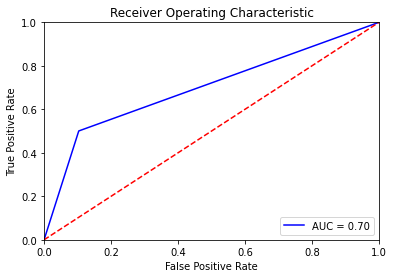

Confidence interval for the score: [0.683 - 0.713]


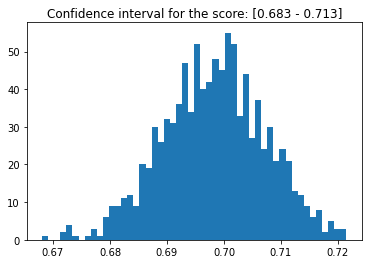

[[1705  197]
 [ 444  445]]
Precision is 0.7432693464612244 
Recall is 0.6984936228397318 
Fscore is 0.7115434319545326 
Support is None 
AUC is 0.6984936228397317


<Figure size 432x288 with 0 Axes>

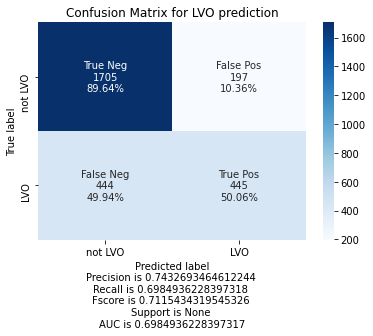

$$$$$$$$$$$$$$$$$$$$$$$$   Enc:HelmertEncoder   $$$$$$$$$$$$$$$$$$$$$$$
leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS9', 'NIHSS10']
[False  True]
leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS9', 'NIHSS10']
check test 8
############### Model: lr ###############
current grid used is: 
{'C': [0.001, 0.01, 0.1], 'penalty': ['l1', 'l2']}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Execution time is 0.051587581634521484 minutes
Best: 0.755351 using {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.001, 'penalty': 'l1'}
0.742792 (0.003951) with: {'C': 0.001, 'penalty': 'l2'}
nan (nan) with: {'C': 0.01, 'penalty': 'l1'}
0.755351 (0.004138) with: {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.1, 'penalty': 'l1'}
0.755145 (0.005376) with: {'C': 0.1, 'penalty': 'l2'}
Precision is [0.79339228 0.69314642] 
Recall is [0.89642482 0.50056243] 
Fscore is [0.84176746 0.5813194 ] 
Support is [1902  889] 
AUC is 0.6984936228397317
{'C': 0.01, 'penalty': 'l2'}
importance is 
[[-0.005593    0.23150409  0.06208414  0.62515574  0.16049727  0.30089744
   0.20706034  0.03293165  0.13272022  0.08491693]]
[0 1]
current grid used is: 
{'C': [0.01], 'penalty': ['l2'], 'max_iter': [300]}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.


Execution time is 0.056151390075683594 minutes
Best: 0.755351 using {'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
0.755351 (0.004138) with: {'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
Precision is [0.79339228 0.69314642] 
Recall is [0.89642482 0.50056243] 
Fscore is [0.84176746 0.5813194 ] 
Support is [1902  889] 
AUC is 0.6984936228397317
{'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
importance is 
[[-0.005593    0.23150409  0.06208414  0.62515574  0.16049727  0.30089744
   0.20706034  0.03293165  0.13272022  0.08491693]]
[0 1]


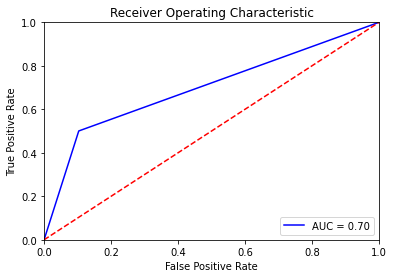

Confidence interval for the score: [0.683 - 0.713]


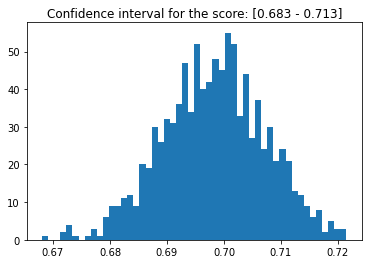

[[1705  197]
 [ 444  445]]
Precision is 0.7432693464612244 
Recall is 0.6984936228397318 
Fscore is 0.7115434319545326 
Support is None 
AUC is 0.6984936228397317


<Figure size 432x288 with 0 Axes>

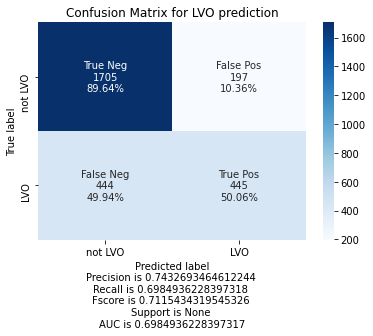

$$$$$$$$$$$$$$$$$$$$$$$$   Enc:OrdinalEncoder   $$$$$$$$$$$$$$$$$$$$$$$
leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS9', 'NIHSS10']
[False  True]
leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS9', 'NIHSS10']
check test 8
############### Model: lr ###############
current grid used is: 
{'C': [0.001, 0.01, 0.1], 'penalty': ['l1', 'l2']}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Execution time is 0.057845115661621094 minutes
Best: 0.755351 using {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.001, 'penalty': 'l1'}
0.742792 (0.003951) with: {'C': 0.001, 'penalty': 'l2'}
nan (nan) with: {'C': 0.01, 'penalty': 'l1'}
0.755351 (0.004138) with: {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.1, 'penalty': 'l1'}
0.755145 (0.005376) with: {'C': 0.1, 'penalty': 'l2'}
Precision is [0.79339228 0.69314642] 
Recall is [0.89642482 0.50056243] 
Fscore is [0.84176746 0.5813194 ] 
Support is [1902  889] 
AUC is 0.6984936228397317
{'C': 0.01, 'penalty': 'l2'}
importance is 
[[-0.005593    0.23150409  0.06208414  0.62515574  0.16049727  0.30089744
   0.20706034  0.03293165  0.13272022  0.08491693]]
[0 1]
current grid used is: 
{'C': [0.01], 'penalty': ['l2'], 'max_iter': [300]}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.


Execution time is 0.057144880294799805 minutes
Best: 0.755351 using {'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
0.755351 (0.004138) with: {'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
Precision is [0.79339228 0.69314642] 
Recall is [0.89642482 0.50056243] 
Fscore is [0.84176746 0.5813194 ] 
Support is [1902  889] 
AUC is 0.6984936228397317
{'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
importance is 
[[-0.005593    0.23150409  0.06208414  0.62515574  0.16049727  0.30089744
   0.20706034  0.03293165  0.13272022  0.08491693]]
[0 1]


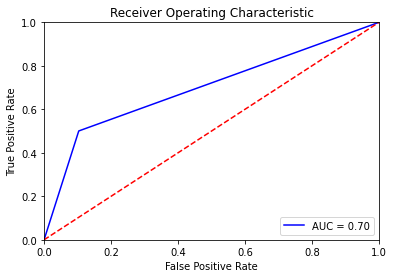

Confidence interval for the score: [0.683 - 0.713]


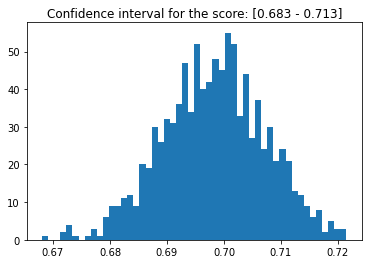

[[1705  197]
 [ 444  445]]
Precision is 0.7432693464612244 
Recall is 0.6984936228397318 
Fscore is 0.7115434319545326 
Support is None 
AUC is 0.6984936228397317


<Figure size 432x288 with 0 Axes>

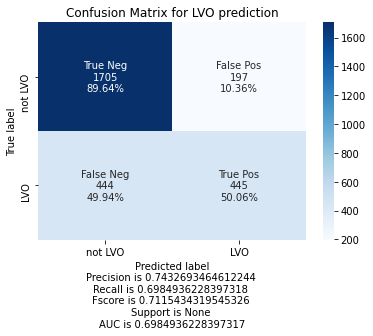

$$$$$$$$$$$$$$$$$$$$$$$$   Enc:SumEncoder   $$$$$$$$$$$$$$$$$$$$$$$
leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS9', 'NIHSS10']
[False  True]
leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS9', 'NIHSS10']
check test 8
############### Model: lr ###############
current grid used is: 
{'C': [0.001, 0.01, 0.1], 'penalty': ['l1', 'l2']}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Execution time is 0.05208730697631836 minutes
Best: 0.755351 using {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.001, 'penalty': 'l1'}
0.742792 (0.003951) with: {'C': 0.001, 'penalty': 'l2'}
nan (nan) with: {'C': 0.01, 'penalty': 'l1'}
0.755351 (0.004138) with: {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.1, 'penalty': 'l1'}
0.755145 (0.005376) with: {'C': 0.1, 'penalty': 'l2'}
Precision is [0.79339228 0.69314642] 
Recall is [0.89642482 0.50056243] 
Fscore is [0.84176746 0.5813194 ] 
Support is [1902  889] 
AUC is 0.6984936228397317
{'C': 0.01, 'penalty': 'l2'}
importance is 
[[-0.005593    0.23150409  0.06208414  0.62515574  0.16049727  0.30089744
   0.20706034  0.03293165  0.13272022  0.08491693]]
[0 1]
current grid used is: 
{'C': [0.01], 'penalty': ['l2'], 'max_iter': [300]}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.


Execution time is 0.0519254207611084 minutes
Best: 0.755351 using {'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
0.755351 (0.004138) with: {'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
Precision is [0.79339228 0.69314642] 
Recall is [0.89642482 0.50056243] 
Fscore is [0.84176746 0.5813194 ] 
Support is [1902  889] 
AUC is 0.6984936228397317
{'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
importance is 
[[-0.005593    0.23150409  0.06208414  0.62515574  0.16049727  0.30089744
   0.20706034  0.03293165  0.13272022  0.08491693]]
[0 1]


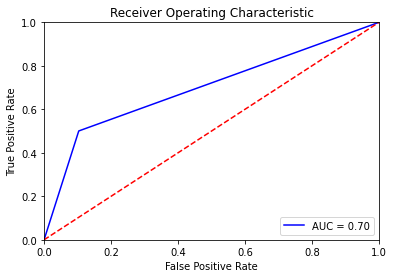

Confidence interval for the score: [0.683 - 0.713]


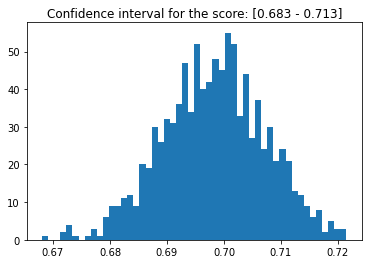

[[1705  197]
 [ 444  445]]
Precision is 0.7432693464612244 
Recall is 0.6984936228397318 
Fscore is 0.7115434319545326 
Support is None 
AUC is 0.6984936228397317


<Figure size 432x288 with 0 Axes>

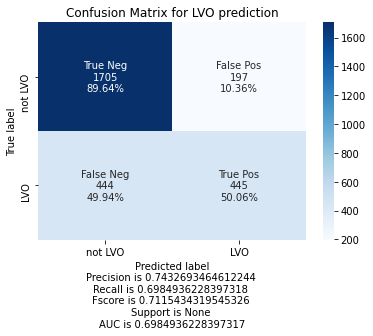

$$$$$$$$$$$$$$$$$$$$$$$$   Enc:WOEEncoder   $$$$$$$$$$$$$$$$$$$$$$$
leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS9', 'NIHSS10']
[False  True]
leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS9', 'NIHSS10']
check test 8
############### Model: lr ###############
current grid used is: 
{'C': [0.001, 0.01, 0.1], 'penalty': ['l1', 'l2']}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Execution time is 0.052289485931396484 minutes
Best: 0.755351 using {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.001, 'penalty': 'l1'}
0.742792 (0.003951) with: {'C': 0.001, 'penalty': 'l2'}
nan (nan) with: {'C': 0.01, 'penalty': 'l1'}
0.755351 (0.004138) with: {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.1, 'penalty': 'l1'}
0.755145 (0.005376) with: {'C': 0.1, 'penalty': 'l2'}
Precision is [0.79339228 0.69314642] 
Recall is [0.89642482 0.50056243] 
Fscore is [0.84176746 0.5813194 ] 
Support is [1902  889] 
AUC is 0.6984936228397317
{'C': 0.01, 'penalty': 'l2'}
importance is 
[[-0.005593    0.23150409  0.06208414  0.62515574  0.16049727  0.30089744
   0.20706034  0.03293165  0.13272022  0.08491693]]
[0 1]
current grid used is: 
{'C': [0.01], 'penalty': ['l2'], 'max_iter': [300]}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.


Execution time is 0.05529046058654785 minutes
Best: 0.755351 using {'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
0.755351 (0.004138) with: {'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
Precision is [0.79339228 0.69314642] 
Recall is [0.89642482 0.50056243] 
Fscore is [0.84176746 0.5813194 ] 
Support is [1902  889] 
AUC is 0.6984936228397317
{'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
importance is 
[[-0.005593    0.23150409  0.06208414  0.62515574  0.16049727  0.30089744
   0.20706034  0.03293165  0.13272022  0.08491693]]
[0 1]


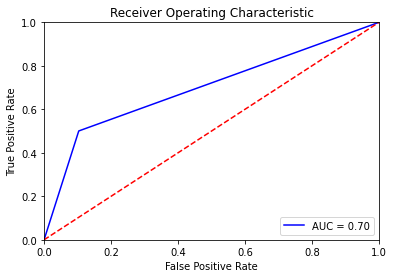

Confidence interval for the score: [0.683 - 0.713]


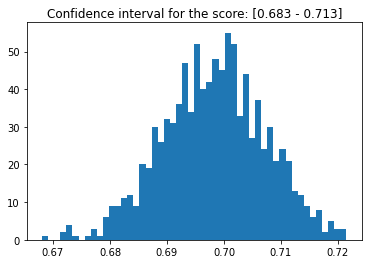

[[1705  197]
 [ 444  445]]
Precision is 0.7432693464612244 
Recall is 0.6984936228397318 
Fscore is 0.7115434319545326 
Support is None 
AUC is 0.6984936228397317


<Figure size 432x288 with 0 Axes>

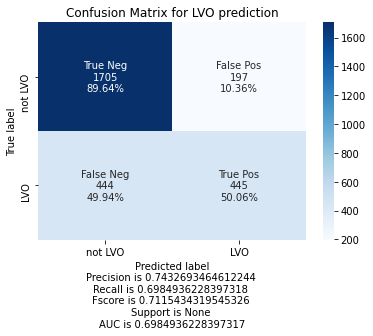

@@@@@@@@@@@@@@@@@@@@@@   ScoreFunction:<function mutual_info_classif at 0x7fbddf896560>   @@@@@@@@@@@@@@@@@@@@@
$$$$$$$$$$$$$$$$$$$$$$$$   Enc:BackwardDifferenceEncoder   $$$$$$$$$$$$$$$$$$$$$$$


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS9', 'NIHSS10']
[False  True]
leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS9', 'NIHSS10']
check test 8
############### Model: lr ###############
current grid used is: 
{'C': [0.001, 0.01, 0.1], 'penalty': ['l1', 'l2']}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Execution time is 0.053395986557006836 minutes
Best: 0.754449 using {'C': 0.1, 'penalty': 'l2'}
nan (nan) with: {'C': 0.001, 'penalty': 'l1'}
0.741818 (0.006502) with: {'C': 0.001, 'penalty': 'l2'}
nan (nan) with: {'C': 0.01, 'penalty': 'l1'}
0.754214 (0.006218) with: {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.1, 'penalty': 'l1'}
0.754449 (0.006007) with: {'C': 0.1, 'penalty': 'l2'}
Precision is [0.79310345 0.68992248] 
Recall is [0.89484753 0.50056243] 
Fscore is [0.84090909 0.58018253] 
Support is [1902  889] 
AUC is 0.6977049793066087
{'C': 0.1, 'penalty': 'l2'}
importance is 
[[-0.02328365  0.25498569  0.04231677  0.72627167  0.34406778  0.2754584
   0.00758381 -0.05775973  0.13410966  0.11201799]]
[0 1]
current grid used is: 
{'C': [0.1], 'penalty': ['l2'], 'max_iter': [300]}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.


Execution time is 0.05485367774963379 minutes
Best: 0.754449 using {'C': 0.1, 'max_iter': 300, 'penalty': 'l2'}
0.754449 (0.006007) with: {'C': 0.1, 'max_iter': 300, 'penalty': 'l2'}
Precision is [0.79310345 0.68992248] 
Recall is [0.89484753 0.50056243] 
Fscore is [0.84090909 0.58018253] 
Support is [1902  889] 
AUC is 0.6977049793066087
{'C': 0.1, 'max_iter': 300, 'penalty': 'l2'}
importance is 
[[-0.02328365  0.25498569  0.04231677  0.72627167  0.34406778  0.2754584
   0.00758381 -0.05775973  0.13410966  0.11201799]]
[0 1]


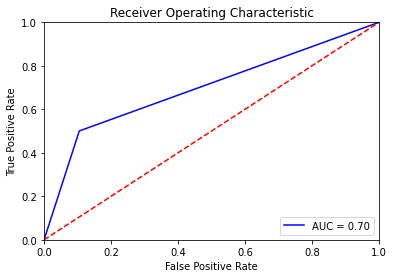

Confidence interval for the score: [0.683 - 0.712]


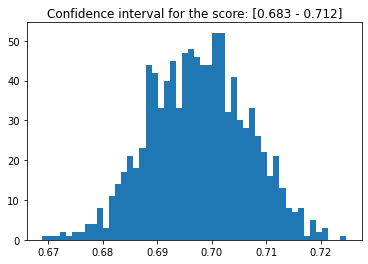

[[1702  200]
 [ 444  445]]
Precision is 0.7415129644480085 
Recall is 0.6977049793066088 
Fscore is 0.7105458101220812 
Support is None 
AUC is 0.6977049793066087


<Figure size 432x288 with 0 Axes>

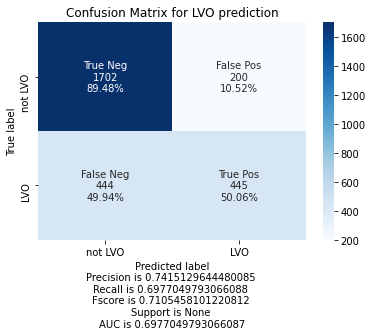

$$$$$$$$$$$$$$$$$$$$$$$$   Enc:HelmertEncoder   $$$$$$$$$$$$$$$$$$$$$$$


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


leftover columns are
['atrialFibrillation', 'NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS9']
Index(['atrialFibrillation'], dtype='object')
[False  True]
leftover columns are
['atrialFibrillation', 'NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS9']
check test 8
############### Model: lr ###############
current grid used is: 
{'C': [0.001, 0.01, 0.1], 'penalty': ['l1', 'l2']}


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Execution time is 0.07989835739135742 minutes
Best: 0.732494 using {'C': 0.1, 'penalty': 'l2'}
nan (nan) with: {'C': 0.001, 'penalty': 'l1'}
0.552657 (0.000233) with: {'C': 0.001, 'penalty': 'l2'}
nan (nan) with: {'C': 0.01, 'penalty': 'l1'}
0.684944 (0.006756) with: {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.1, 'penalty': 'l1'}
0.732494 (0.006073) with: {'C': 0.1, 'penalty': 'l2'}
Precision is [0.77450529 0.64563107] 
Recall is [0.88485804 0.4488189 ] 
Fscore is [0.82601227 0.52952887] 
Support is [1902  889] 
AUC is 0.6668384709009166
{'C': 0.1, 'penalty': 'l2'}
importance is 
[[-1.31362705e-03  3.53068877e-01  1.54195793e+00  1.31910792e+00
   1.51607976e+00  2.40938829e+00  1.38637026e+00  1.11709405e+00
   7.09068443e-01  3.64253626e-01  7.04435490e-01]]
[0 1]
current grid used is: 
{'C': [0.1], 'penalty': ['l2'], 'max_iter': [300]}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.


Execution time is 0.08296418190002441 minutes
Best: 0.732494 using {'C': 0.1, 'max_iter': 300, 'penalty': 'l2'}
0.732494 (0.006073) with: {'C': 0.1, 'max_iter': 300, 'penalty': 'l2'}
Precision is [0.77450529 0.64563107] 
Recall is [0.88485804 0.4488189 ] 
Fscore is [0.82601227 0.52952887] 
Support is [1902  889] 
AUC is 0.6668384709009166
{'C': 0.1, 'max_iter': 300, 'penalty': 'l2'}
importance is 
[[-1.31362705e-03  3.53068877e-01  1.54195793e+00  1.31910792e+00
   1.51607976e+00  2.40938829e+00  1.38637026e+00  1.11709405e+00
   7.09068443e-01  3.64253626e-01  7.04435490e-01]]
[0 1]


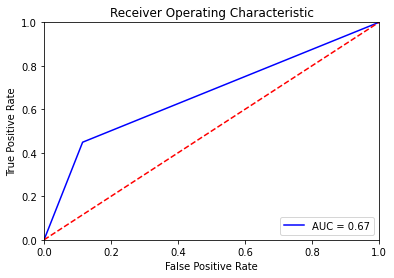

Confidence interval for the score: [0.651 - 0.681]


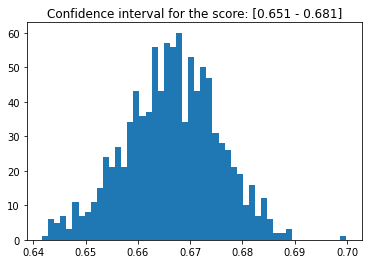

[[1683  219]
 [ 490  399]]
Precision is 0.7100681800919493 
Recall is 0.6668384709009165 
Fscore is 0.6777705676169695 
Support is None 
AUC is 0.6668384709009166


<Figure size 432x288 with 0 Axes>

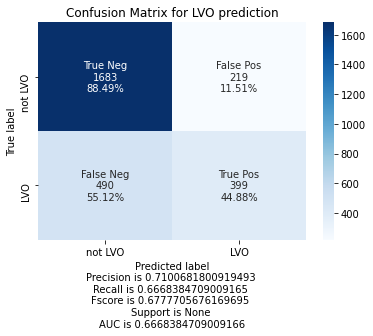

$$$$$$$$$$$$$$$$$$$$$$$$   Enc:OrdinalEncoder   $$$$$$$$$$$$$$$$$$$$$$$


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS9']
[False  True]
leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS9']
check test 8
############### Model: lr ###############
current grid used is: 
{'C': [0.001, 0.01, 0.1], 'penalty': ['l1', 'l2']}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Execution time is 0.061907291412353516 minutes
Best: 0.756503 using {'C': 0.1, 'penalty': 'l2'}
nan (nan) with: {'C': 0.001, 'penalty': 'l1'}
0.743638 (0.005793) with: {'C': 0.001, 'penalty': 'l2'}
nan (nan) with: {'C': 0.01, 'penalty': 'l1'}
0.756134 (0.005098) with: {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.1, 'penalty': 'l1'}
0.756503 (0.004352) with: {'C': 0.1, 'penalty': 'l2'}
Precision is [0.7958042  0.69814241] 
Recall is [0.89747634 0.50731159] 
Fscore is [0.84358784 0.58762215] 
Support is [1902  889] 
AUC is 0.702393963372875
{'C': 0.1, 'penalty': 'l2'}
importance is 
[[-0.01622658  0.27073489  0.04741268  0.70036699  0.17295882  0.3283688
   0.26820914  0.0073568  -0.06066794  0.12875922]]
[0 1]
current grid used is: 
{'C': [0.1], 'penalty': ['l2'], 'max_iter': [300]}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.


Execution time is 0.07160711288452148 minutes
Best: 0.756503 using {'C': 0.1, 'max_iter': 300, 'penalty': 'l2'}
0.756503 (0.004352) with: {'C': 0.1, 'max_iter': 300, 'penalty': 'l2'}
Precision is [0.7958042  0.69814241] 
Recall is [0.89747634 0.50731159] 
Fscore is [0.84358784 0.58762215] 
Support is [1902  889] 
AUC is 0.702393963372875
{'C': 0.1, 'max_iter': 300, 'penalty': 'l2'}
importance is 
[[-0.01622658  0.27073489  0.04741268  0.70036699  0.17295882  0.3283688
   0.26820914  0.0073568  -0.06066794  0.12875922]]
[0 1]


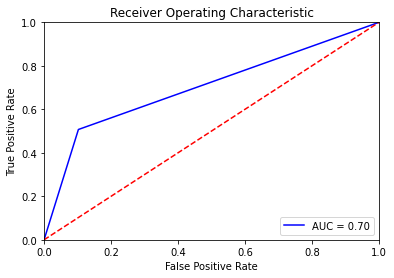

Confidence interval for the score: [0.688 - 0.717]


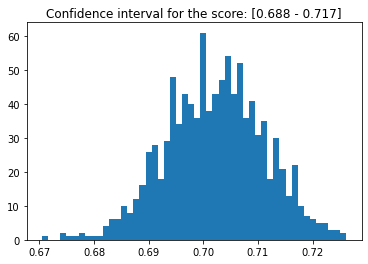

[[1707  195]
 [ 438  451]]
Precision is 0.7469733053324384 
Recall is 0.7023939633728749 
Fscore is 0.7156049963418433 
Support is None 
AUC is 0.702393963372875


<Figure size 432x288 with 0 Axes>

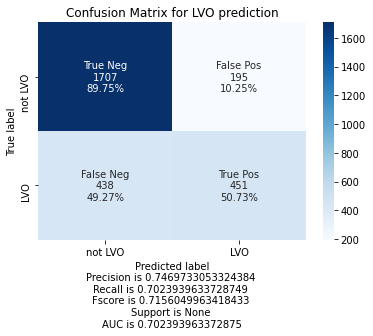

$$$$$$$$$$$$$$$$$$$$$$$$   Enc:SumEncoder   $$$$$$$$$$$$$$$$$$$$$$$


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS9']
[False  True]
leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS9']
check test 8
############### Model: lr ###############
current grid used is: 
{'C': [0.001, 0.01, 0.1], 'penalty': ['l1', 'l2']}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Execution time is 0.062355995178222656 minutes
Best: 0.756503 using {'C': 0.1, 'penalty': 'l2'}
nan (nan) with: {'C': 0.001, 'penalty': 'l1'}
0.743638 (0.005793) with: {'C': 0.001, 'penalty': 'l2'}
nan (nan) with: {'C': 0.01, 'penalty': 'l1'}
0.756134 (0.005098) with: {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.1, 'penalty': 'l1'}
0.756503 (0.004352) with: {'C': 0.1, 'penalty': 'l2'}
Precision is [0.7958042  0.69814241] 
Recall is [0.89747634 0.50731159] 
Fscore is [0.84358784 0.58762215] 
Support is [1902  889] 
AUC is 0.702393963372875
{'C': 0.1, 'penalty': 'l2'}
importance is 
[[-0.01622658  0.27073489  0.04741268  0.70036699  0.17295882  0.3283688
   0.26820914  0.0073568  -0.06066794  0.12875922]]
[0 1]
current grid used is: 
{'C': [0.1], 'penalty': ['l2'], 'max_iter': [300]}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.


Execution time is 0.06703543663024902 minutes
Best: 0.756503 using {'C': 0.1, 'max_iter': 300, 'penalty': 'l2'}
0.756503 (0.004352) with: {'C': 0.1, 'max_iter': 300, 'penalty': 'l2'}
Precision is [0.7958042  0.69814241] 
Recall is [0.89747634 0.50731159] 
Fscore is [0.84358784 0.58762215] 
Support is [1902  889] 
AUC is 0.702393963372875
{'C': 0.1, 'max_iter': 300, 'penalty': 'l2'}
importance is 
[[-0.01622658  0.27073489  0.04741268  0.70036699  0.17295882  0.3283688
   0.26820914  0.0073568  -0.06066794  0.12875922]]
[0 1]


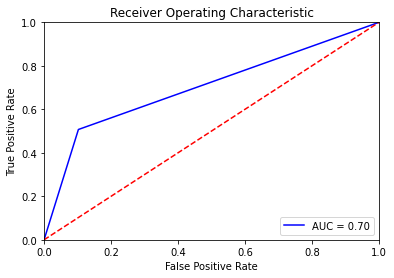

Confidence interval for the score: [0.688 - 0.717]


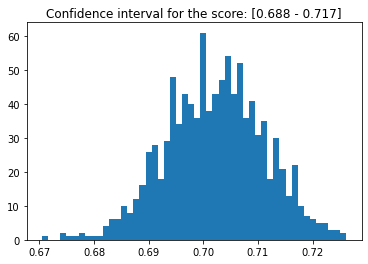

[[1707  195]
 [ 438  451]]
Precision is 0.7469733053324384 
Recall is 0.7023939633728749 
Fscore is 0.7156049963418433 
Support is None 
AUC is 0.702393963372875


<Figure size 432x288 with 0 Axes>

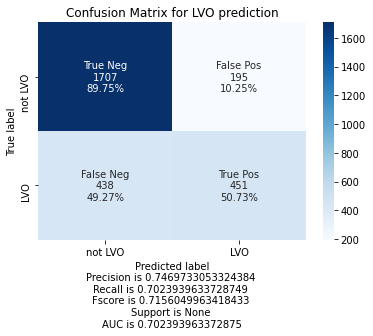

$$$$$$$$$$$$$$$$$$$$$$$$   Enc:WOEEncoder   $$$$$$$$$$$$$$$$$$$$$$$


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS9']
[False  True]
leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS6b', 'NIHSS9']
check test 8
############### Model: lr ###############
current grid used is: 
{'C': [0.001, 0.01, 0.1], 'penalty': ['l1', 'l2']}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Execution time is 0.06343603134155273 minutes
Best: 0.756503 using {'C': 0.1, 'penalty': 'l2'}
nan (nan) with: {'C': 0.001, 'penalty': 'l1'}
0.743638 (0.005793) with: {'C': 0.001, 'penalty': 'l2'}
nan (nan) with: {'C': 0.01, 'penalty': 'l1'}
0.756134 (0.005098) with: {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.1, 'penalty': 'l1'}
0.756503 (0.004352) with: {'C': 0.1, 'penalty': 'l2'}
Precision is [0.7958042  0.69814241] 
Recall is [0.89747634 0.50731159] 
Fscore is [0.84358784 0.58762215] 
Support is [1902  889] 
AUC is 0.702393963372875
{'C': 0.1, 'penalty': 'l2'}
importance is 
[[-0.01622658  0.27073489  0.04741268  0.70036699  0.17295882  0.3283688
   0.26820914  0.0073568  -0.06066794  0.12875922]]
[0 1]
current grid used is: 
{'C': [0.1], 'penalty': ['l2'], 'max_iter': [300]}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.


Execution time is 0.09626483917236328 minutes
Best: 0.756503 using {'C': 0.1, 'max_iter': 300, 'penalty': 'l2'}
0.756503 (0.004352) with: {'C': 0.1, 'max_iter': 300, 'penalty': 'l2'}
Precision is [0.7958042  0.69814241] 
Recall is [0.89747634 0.50731159] 
Fscore is [0.84358784 0.58762215] 
Support is [1902  889] 
AUC is 0.702393963372875
{'C': 0.1, 'max_iter': 300, 'penalty': 'l2'}
importance is 
[[-0.01622658  0.27073489  0.04741268  0.70036699  0.17295882  0.3283688
   0.26820914  0.0073568  -0.06066794  0.12875922]]
[0 1]


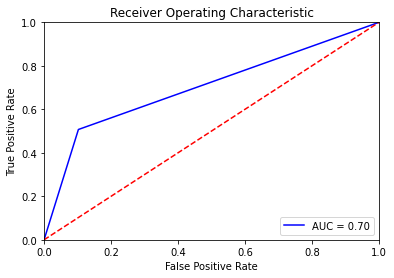

Confidence interval for the score: [0.688 - 0.717]


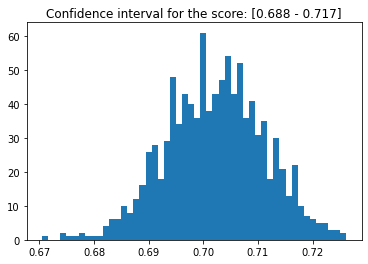

[[1707  195]
 [ 438  451]]
Precision is 0.7469733053324384 
Recall is 0.7023939633728749 
Fscore is 0.7156049963418433 
Support is None 
AUC is 0.702393963372875


<Figure size 432x288 with 0 Axes>

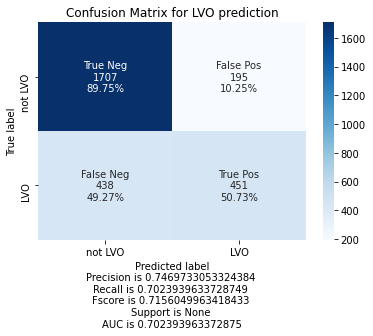

@@@@@@@@@@@@@@@@@@@@@@   ScoreFunction:<function f_regression at 0x7fbddfd410e0>   @@@@@@@@@@@@@@@@@@@@@
$$$$$$$$$$$$$$$$$$$$$$$$   Enc:BackwardDifferenceEncoder   $$$$$$$$$$$$$$$$$$$$$$$
leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS9', 'NIHSS10']
[False  True]
leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS9', 'NIHSS10']
check test 8
############### Model: lr ###############
current grid used is: 
{'C': [0.001, 0.01, 0.1], 'penalty': ['l1', 'l2']}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Execution time is 0.05110430717468262 minutes
Best: 0.755351 using {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.001, 'penalty': 'l1'}
0.742792 (0.003951) with: {'C': 0.001, 'penalty': 'l2'}
nan (nan) with: {'C': 0.01, 'penalty': 'l1'}
0.755351 (0.004138) with: {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.1, 'penalty': 'l1'}
0.755145 (0.005376) with: {'C': 0.1, 'penalty': 'l2'}
Precision is [0.79339228 0.69314642] 
Recall is [0.89642482 0.50056243] 
Fscore is [0.84176746 0.5813194 ] 
Support is [1902  889] 
AUC is 0.6984936228397317
{'C': 0.01, 'penalty': 'l2'}
importance is 
[[-0.005593    0.23150409  0.06208414  0.62515574  0.16049727  0.30089744
   0.20706034  0.03293165  0.13272022  0.08491693]]
[0 1]
current grid used is: 
{'C': [0.01], 'penalty': ['l2'], 'max_iter': [300]}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.


Execution time is 0.05395317077636719 minutes
Best: 0.755351 using {'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
0.755351 (0.004138) with: {'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
Precision is [0.79339228 0.69314642] 
Recall is [0.89642482 0.50056243] 
Fscore is [0.84176746 0.5813194 ] 
Support is [1902  889] 
AUC is 0.6984936228397317
{'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
importance is 
[[-0.005593    0.23150409  0.06208414  0.62515574  0.16049727  0.30089744
   0.20706034  0.03293165  0.13272022  0.08491693]]
[0 1]


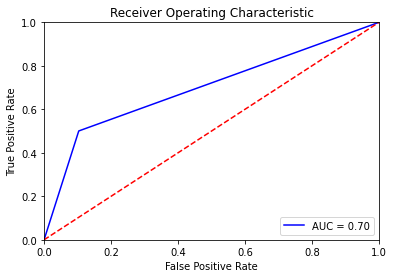

Confidence interval for the score: [0.683 - 0.713]


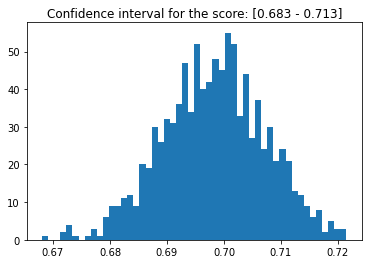

[[1705  197]
 [ 444  445]]
Precision is 0.7432693464612244 
Recall is 0.6984936228397318 
Fscore is 0.7115434319545326 
Support is None 
AUC is 0.6984936228397317


<Figure size 432x288 with 0 Axes>

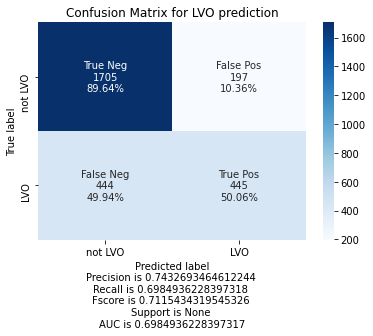

$$$$$$$$$$$$$$$$$$$$$$$$   Enc:HelmertEncoder   $$$$$$$$$$$$$$$$$$$$$$$
leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS9', 'NIHSS10']
[False  True]
leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS9', 'NIHSS10']
check test 8
############### Model: lr ###############
current grid used is: 
{'C': [0.001, 0.01, 0.1], 'penalty': ['l1', 'l2']}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Execution time is 0.05080819129943848 minutes
Best: 0.755351 using {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.001, 'penalty': 'l1'}
0.742792 (0.003951) with: {'C': 0.001, 'penalty': 'l2'}
nan (nan) with: {'C': 0.01, 'penalty': 'l1'}
0.755351 (0.004138) with: {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.1, 'penalty': 'l1'}
0.755145 (0.005376) with: {'C': 0.1, 'penalty': 'l2'}
Precision is [0.79339228 0.69314642] 
Recall is [0.89642482 0.50056243] 
Fscore is [0.84176746 0.5813194 ] 
Support is [1902  889] 
AUC is 0.6984936228397317
{'C': 0.01, 'penalty': 'l2'}
importance is 
[[-0.005593    0.23150409  0.06208414  0.62515574  0.16049727  0.30089744
   0.20706034  0.03293165  0.13272022  0.08491693]]
[0 1]
current grid used is: 
{'C': [0.01], 'penalty': ['l2'], 'max_iter': [300]}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.


Execution time is 0.057248830795288086 minutes
Best: 0.755351 using {'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
0.755351 (0.004138) with: {'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
Precision is [0.79339228 0.69314642] 
Recall is [0.89642482 0.50056243] 
Fscore is [0.84176746 0.5813194 ] 
Support is [1902  889] 
AUC is 0.6984936228397317
{'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
importance is 
[[-0.005593    0.23150409  0.06208414  0.62515574  0.16049727  0.30089744
   0.20706034  0.03293165  0.13272022  0.08491693]]
[0 1]


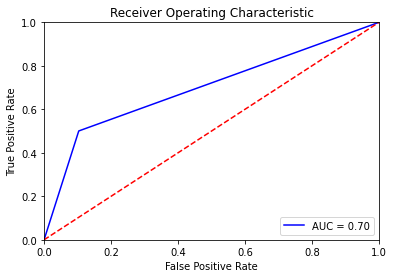

Confidence interval for the score: [0.683 - 0.713]


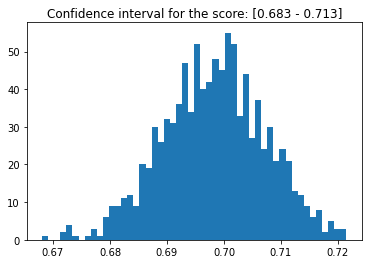

[[1705  197]
 [ 444  445]]
Precision is 0.7432693464612244 
Recall is 0.6984936228397318 
Fscore is 0.7115434319545326 
Support is None 
AUC is 0.6984936228397317


<Figure size 432x288 with 0 Axes>

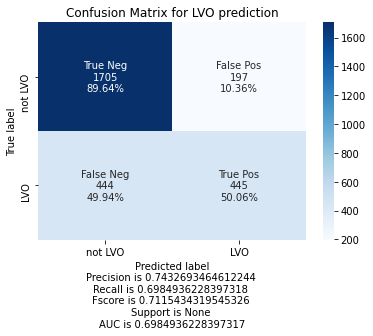

$$$$$$$$$$$$$$$$$$$$$$$$   Enc:OrdinalEncoder   $$$$$$$$$$$$$$$$$$$$$$$
leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS9', 'NIHSS10']
[False  True]
leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS9', 'NIHSS10']
check test 8
############### Model: lr ###############
current grid used is: 
{'C': [0.001, 0.01, 0.1], 'penalty': ['l1', 'l2']}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Execution time is 0.0523076057434082 minutes
Best: 0.755351 using {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.001, 'penalty': 'l1'}
0.742792 (0.003951) with: {'C': 0.001, 'penalty': 'l2'}
nan (nan) with: {'C': 0.01, 'penalty': 'l1'}
0.755351 (0.004138) with: {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.1, 'penalty': 'l1'}
0.755145 (0.005376) with: {'C': 0.1, 'penalty': 'l2'}
Precision is [0.79339228 0.69314642] 
Recall is [0.89642482 0.50056243] 
Fscore is [0.84176746 0.5813194 ] 
Support is [1902  889] 
AUC is 0.6984936228397317
{'C': 0.01, 'penalty': 'l2'}
importance is 
[[-0.005593    0.23150409  0.06208414  0.62515574  0.16049727  0.30089744
   0.20706034  0.03293165  0.13272022  0.08491693]]
[0 1]
current grid used is: 
{'C': [0.01], 'penalty': ['l2'], 'max_iter': [300]}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.


Execution time is 0.05246782302856445 minutes
Best: 0.755351 using {'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
0.755351 (0.004138) with: {'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
Precision is [0.79339228 0.69314642] 
Recall is [0.89642482 0.50056243] 
Fscore is [0.84176746 0.5813194 ] 
Support is [1902  889] 
AUC is 0.6984936228397317
{'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
importance is 
[[-0.005593    0.23150409  0.06208414  0.62515574  0.16049727  0.30089744
   0.20706034  0.03293165  0.13272022  0.08491693]]
[0 1]


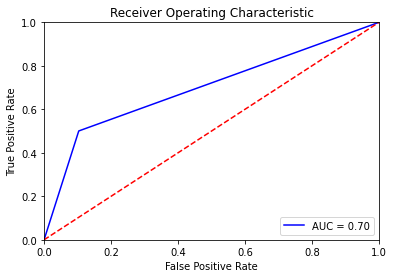

Confidence interval for the score: [0.683 - 0.713]


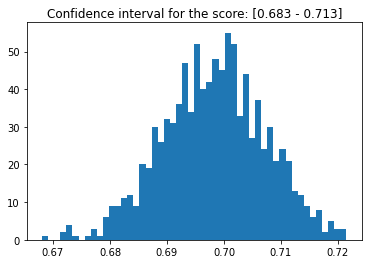

[[1705  197]
 [ 444  445]]
Precision is 0.7432693464612244 
Recall is 0.6984936228397318 
Fscore is 0.7115434319545326 
Support is None 
AUC is 0.6984936228397317


<Figure size 432x288 with 0 Axes>

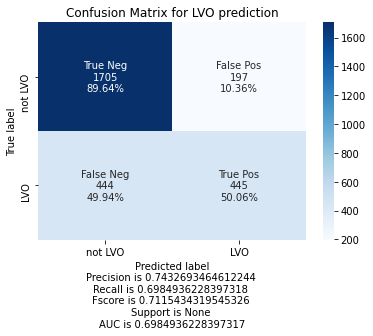

$$$$$$$$$$$$$$$$$$$$$$$$   Enc:SumEncoder   $$$$$$$$$$$$$$$$$$$$$$$
leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS9', 'NIHSS10']
[False  True]
leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS9', 'NIHSS10']
check test 8
############### Model: lr ###############
current grid used is: 
{'C': [0.001, 0.01, 0.1], 'penalty': ['l1', 'l2']}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Execution time is 0.05109858512878418 minutes
Best: 0.755351 using {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.001, 'penalty': 'l1'}
0.742792 (0.003951) with: {'C': 0.001, 'penalty': 'l2'}
nan (nan) with: {'C': 0.01, 'penalty': 'l1'}
0.755351 (0.004138) with: {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.1, 'penalty': 'l1'}
0.755145 (0.005376) with: {'C': 0.1, 'penalty': 'l2'}
Precision is [0.79339228 0.69314642] 
Recall is [0.89642482 0.50056243] 
Fscore is [0.84176746 0.5813194 ] 
Support is [1902  889] 
AUC is 0.6984936228397317
{'C': 0.01, 'penalty': 'l2'}
importance is 
[[-0.005593    0.23150409  0.06208414  0.62515574  0.16049727  0.30089744
   0.20706034  0.03293165  0.13272022  0.08491693]]
[0 1]
current grid used is: 
{'C': [0.01], 'penalty': ['l2'], 'max_iter': [300]}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.


Execution time is 0.060066938400268555 minutes
Best: 0.755351 using {'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
0.755351 (0.004138) with: {'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
Precision is [0.79339228 0.69314642] 
Recall is [0.89642482 0.50056243] 
Fscore is [0.84176746 0.5813194 ] 
Support is [1902  889] 
AUC is 0.6984936228397317
{'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
importance is 
[[-0.005593    0.23150409  0.06208414  0.62515574  0.16049727  0.30089744
   0.20706034  0.03293165  0.13272022  0.08491693]]
[0 1]


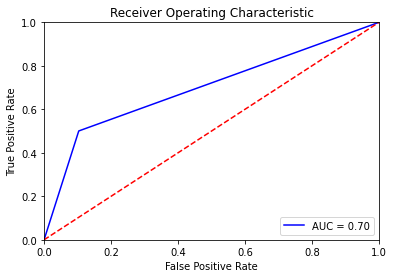

Confidence interval for the score: [0.683 - 0.713]


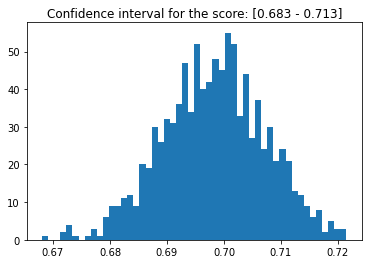

[[1705  197]
 [ 444  445]]
Precision is 0.7432693464612244 
Recall is 0.6984936228397318 
Fscore is 0.7115434319545326 
Support is None 
AUC is 0.6984936228397317


<Figure size 432x288 with 0 Axes>

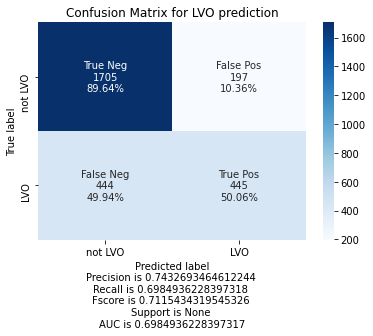

$$$$$$$$$$$$$$$$$$$$$$$$   Enc:WOEEncoder   $$$$$$$$$$$$$$$$$$$$$$$
leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS9', 'NIHSS10']
[False  True]
leftover columns are
['NIHSS1a', 'NIHSS1b', 'NIHSS1c', 'NIHSS2', 'NIHSS4', 'NIHSS5a', 'NIHSS5b', 'NIHSS6a', 'NIHSS9', 'NIHSS10']
check test 8
############### Model: lr ###############
current grid used is: 
{'C': [0.001, 0.01, 0.1], 'penalty': ['l1', 'l2']}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Execution time is 0.05809426307678223 minutes
Best: 0.755351 using {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.001, 'penalty': 'l1'}
0.742792 (0.003951) with: {'C': 0.001, 'penalty': 'l2'}
nan (nan) with: {'C': 0.01, 'penalty': 'l1'}
0.755351 (0.004138) with: {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.1, 'penalty': 'l1'}
0.755145 (0.005376) with: {'C': 0.1, 'penalty': 'l2'}
Precision is [0.79339228 0.69314642] 
Recall is [0.89642482 0.50056243] 
Fscore is [0.84176746 0.5813194 ] 
Support is [1902  889] 
AUC is 0.6984936228397317
{'C': 0.01, 'penalty': 'l2'}
importance is 
[[-0.005593    0.23150409  0.06208414  0.62515574  0.16049727  0.30089744
   0.20706034  0.03293165  0.13272022  0.08491693]]
[0 1]
current grid used is: 
{'C': [0.01], 'penalty': ['l2'], 'max_iter': [300]}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.


Execution time is 0.05221366882324219 minutes
Best: 0.755351 using {'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
0.755351 (0.004138) with: {'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
Precision is [0.79339228 0.69314642] 
Recall is [0.89642482 0.50056243] 
Fscore is [0.84176746 0.5813194 ] 
Support is [1902  889] 
AUC is 0.6984936228397317
{'C': 0.01, 'max_iter': 300, 'penalty': 'l2'}
importance is 
[[-0.005593    0.23150409  0.06208414  0.62515574  0.16049727  0.30089744
   0.20706034  0.03293165  0.13272022  0.08491693]]
[0 1]


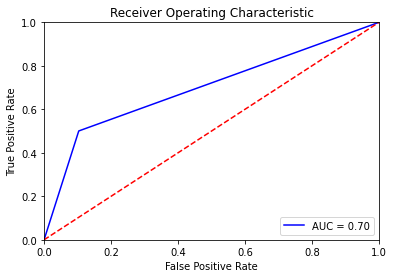

Confidence interval for the score: [0.683 - 0.713]


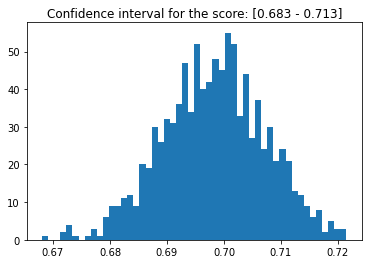

[[1705  197]
 [ 444  445]]
Precision is 0.7432693464612244 
Recall is 0.6984936228397318 
Fscore is 0.7115434319545326 
Support is None 
AUC is 0.6984936228397317


<Figure size 432x288 with 0 Axes>

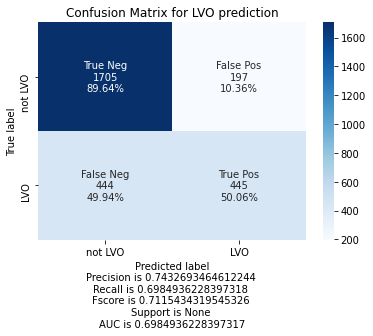

0.702393963372875


'\nw/o resample \n\n Enc:WOEEncoder + rf + f_regression\nPrecision is 0.754037598729604 \nRecall is 0.7040906524839553 \nFscore is 0.7209070584477802 \nSupport is None \nAUC is 0.7040906524839554\n\n\nw/ resample\nlr + Enc:OrdinalEncoder + f_classif\nPrecision is 0.7240856738735097 \nRecall is 0.7491921945566913 \nFscore is 0.7333033718496091 \nSupport is None \nAUC is 0.7491921945566912\n[[972 230]\n [139 309]]\n'

In [37]:
import category_encoders as ce


saveFile = False
debugMode = False
models = ['lr']

# select encoding type
encs = [
      'BackwardDifferenceEncoder',
      # ce.BinaryEncoder(),
      # ce.CatBoostEncoder(),
      # ce.GLMMEncoder(),
      # ce.HashingEncoder(),
      'HelmertEncoder',
      # ce.JamesSteinEncoder(),
      # ce.LeaveOneOutEncoder(),
      # ce.MEstimateEncoder(),
      # ce.OneHotEncoder(),
      'OrdinalEncoder',
      'SumEncoder',
      # ce.PolynomialEncoder(),
      # ce.TargetEncoder(),
      'WOEEncoder'
]

# select score function for feature selection
scoreFunctions=[
      'f_classif',    #(0.791)
      'mutual_info_classif', #(~0.798 * 5)
      # 'chi2',  #(~0.776 * 5)
      'f_regression', #(~0.792 * 5)
      # 'mutual_info_regression' #(0.78*3， 0.793*2) 
]

auc = runAll(models, encs=encs, scoreFunctions=scoreFunctions)

print("^^^^^^final AUC is ^^^^^^^^^^^^^")
print(auc)

"""
w/o resample 

 Enc:WOEEncoder + rf + f_regression
Precision is 0.754037598729604 
Recall is 0.7040906524839553 
Fscore is 0.7209070584477802 
Support is None 
AUC is 0.7040906524839554


w/ resample
lr + Enc:OrdinalEncoder + f_classif
Precision is 0.7240856738735097 
Recall is 0.7491921945566913 
Fscore is 0.7333033718496091 
Support is None 
AUC is 0.7491921945566912
[[972 230]
 [139 309]]
"""

# Run One

@@@@@@@@@@@@@@@@@@@@@@   ScoreFunction:<function f_regression at 0x7fbddfd410e0>   @@@@@@@@@@@@@@@@@@@@@
$$$$$$$$$$$$$$$$$$$$$$$$   Enc:OrdinalEncoder   $$$$$$$$$$$$$$$$$$$$$$$
Index(['gender', 'smoke', 'highBloodPressure', 'atrialFibrillation',
       'diabetes', 'coronaryHeartDisease', 'congestiveHeartFailure',
       'anticoagulantMedicalHistory'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


[False  True]
check test 8
############### Model: rf ###############
current grid used is: 
{'n_estimators': [30, 50], 'max_depth': [10, 15, 20]}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 0.855954647064209 minutes
Best: 0.772692 using {'max_depth': 10, 'n_estimators': 50}
0.769804 (0.005788) with: {'max_depth': 10, 'n_estimators': 30}
0.772692 (0.006128) with: {'max_depth': 10, 'n_estimators': 50}
0.767673 (0.006748) with: {'max_depth': 15, 'n_estimators': 30}
0.767886 (0.004570) with: {'max_depth': 15, 'n_estimators': 50}
0.766108 (0.005837) with: {'max_depth': 20, 'n_estimators': 30}
0.767470 (0.005469) with: {'max_depth': 20, 'n_estimators': 50}
Precision is [0.81479643 0.66409266] 
Recall is [0.86277603 0.58042745] 
Fscore is [0.8381001  0.61944778] 
Support is [1902  889] 
AUC is 0.7216017359028859
{'max_depth': 10, 'n_estimators': 50}
current grid used is: 
{'n_estimators': [50], 'max_depth': [10], 'bootstrap': [True, False], 'max_features': [5, 8, None]}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 1.2726757526397705 minutes
Best: 0.773266 using {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'n_estimators': 50}
0.772164 (0.005136) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 50}
0.773266 (0.003884) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'n_estimators': 50}
0.769362 (0.004359) with: {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'n_estimators': 50}
0.771092 (0.003953) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 5, 'n_estimators': 50}
0.767869 (0.004929) with: {'bootstrap': False, 'max_depth': 10, 'max_features': 8, 'n_estimators': 50}
0.741537 (0.008717) with: {'bootstrap': False, 'max_depth': 10, 'max_features': None, 'n_estimators': 50}
Precision is [0.80819912 0.66846361] 
Recall is [0.87066246 0.55793026] 
Fscore is [0.83826879 0.60821582] 
Support is [1902  889] 
AUC is 0.7142963596427419
{'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'n_estimators': 50}
cur

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time is 1.189293384552002 minutes
Best: 0.773753 using {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}
0.773270 (0.005086) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 50}
0.771099 (0.006452) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}
0.773149 (0.004692) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 50}
0.773753 (0.003542) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}
Precision is [0.81111658 0.66622691] 
Recall is [0.86698212 0.56805399] 
Fscore is [0.83811944 0.61323619] 
Support is [1902  889] 
AUC is 0.7175180586653798
{'bootstrap': True, 'max_depth': 10, 'max_features':

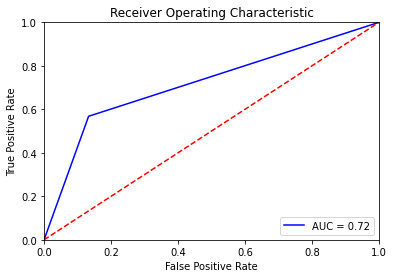

Confidence interval for the score: [0.702 - 0.731]


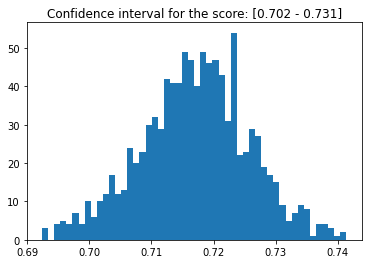

[[1649  253]
 [ 384  505]]
Precision is 0.7386717447083544 
Recall is 0.7175180586653798 
Fscore is 0.7256778139607727 
Support is None 
AUC is 0.7175180586653798


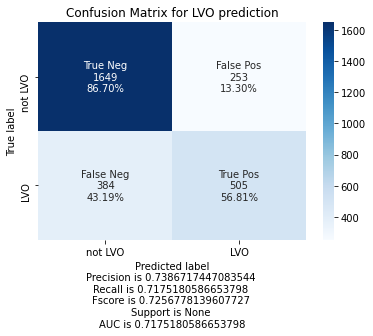

'\nw/o resample \n\n Enc:WOEEncoder + rf + f_regression\nPrecision is 0.754037598729604 \nRecall is 0.7040906524839553 \nFscore is 0.7209070584477802 \nSupport is None \nAUC is 0.7040906524839554\n\n\nw/ resample\nlr + Enc:OrdinalEncoder + f_classif\nPrecision is 0.7240856738735097 \nRecall is 0.7491921945566913 \nFscore is 0.7333033718496091 \nSupport is None \nAUC is 0.7491921945566912\n[[972 230]\n [139 309]]\n'

In [28]:
import category_encoders as ce


saveFile = True
debugMode = False
models = ['rf']

# select encoding type
encs = [
      'OrdinalEncoder',
]

# select score function for feature selection
scoreFunctions=[
      'f_regression', #(~0.792 * 5)
]

runAll(models, encs=encs, scoreFunctions=scoreFunctions)


"""
w/o resample 

 Enc:WOEEncoder + rf + f_regression
Precision is 0.754037598729604 
Recall is 0.7040906524839553 
Fscore is 0.7209070584477802 
Support is None 
AUC is 0.7040906524839554


w/ resample
lr + Enc:OrdinalEncoder + f_classif
Precision is 0.7240856738735097 
Recall is 0.7491921945566913 
Fscore is 0.7333033718496091 
Support is None 
AUC is 0.7491921945566912
[[972 230]
 [139 309]]
"""

# Getting Features & Graphs


In [ ]:
import pickle

factor = 'SAO'
filePath = 'drive/My Drive/Colab Notebooks/preHospitalPrediction/project1/encoder/preprocessor.pkl'
with open (filePath, 'rb') as f:
      preprocessor = pickle.load(f)

In [ ]:
filePath = "drive/My Drive/Colab Notebooks/preHospitalPrediction/project1/models/persistedModel.pkl"
with open (filePath, 'rb') as f:
      model = pickle.load(f)

In [ ]:
model.__dict__

{'C': 0.1,
 'class_weight': None,
 'classes_': array([0, 1]),
 'coef_': array([[ 0.93851846,  0.3614348 ,  1.0188307 ,  0.87795937,  1.39928017,
          0.98527736,  1.30178076, -0.44200426,  0.13772724,  2.0491175 ,
          1.21184455,  1.21153706,  0.4011225 ,  0.48824656,  0.34639473,
          2.27843691,  1.90344557,  2.34111901,  1.83333343,  0.31496778,
          0.74496371,  1.26405321,  0.90509633,  0.94722447,  0.36997935,
         -0.60234813]]),
 'dual': False,
 'fit_intercept': True,
 'intercept_': array([-0.19499749]),
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 300,
 'multi_class': 'auto',
 'n_iter_': array([21], dtype=int32),
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
preprocessor.__dict__

{'_encoder': WOEEncoder(cols=Index(['sex', 'smoke', 'highBloodPressure', 'atrialFibrillation', 'diabetes',
        'coronaryHeartDisease', 'congestiveHeartFailure',
        'anticoagulantMedicalHistory'],
       dtype='object'),
            drop_invariant=False, handle_missing='value', handle_unknown='value',
            random_state=None, randomized=False, regularization=1.0,
            return_df=True, sigma=0.05, verbose=0),
 '_featureEliminator': None,
 '_labelEncoder': LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False),
 '_normalizer': Normalizer(copy=True, norm='l2'),
 '_pcaEncoder': None}

In [ ]:
# featureNames = preprocessor._featureName
# featurePairs = zip(bestModel.feature_importances_, featureNames)

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

AttributeError: ignored

In [ ]:
print(preprocessor._encoder.get_params())

{'cols': Index(['P_AF', 'Anterior circulation infarction', 'LVO',
       'Degree of stenosis of intracranial arteries',
       'Moderate to severe intracranial artery stenosis', 'Newly diagnosed AF',
       'D_AF'],
      dtype='object'), 'drop_invariant': False, 'handle_missing': 'value', 'handle_unknown': 'value', 'mapping': [{'col': 'P_AF', 'mapping': False    1
True     2
NaN     -2
dtype: int64, 'data_type': dtype('O')}, {'col': 'Anterior circulation infarction', 'mapping': False    1
True     2
NaN     -2
dtype: int64, 'data_type': dtype('O')}, {'col': 'LVO', 'mapping': False    1
True     2
NaN     -2
dtype: int64, 'data_type': dtype('O')}, {'col': 'Degree of stenosis of intracranial arteries', 'mapping': 1.0    1
0.0    2
3.0    3
2.0    4
NaN   -2
dtype: int64, 'data_type': dtype('O')}, {'col': 'Moderate to severe intracranial artery stenosis', 'mapping': False    1
True     2
NaN     -2
dtype: int64, 'data_type': dtype('O')}, {'col': 'Newly diagnosed AF', 'mapping': False    

In [ ]:
newlist = []
print()
for jsonObj in preprocessor._encoder.get_params()['mapping']: # .mapping:
  col = jsonObj['col']
  mapping = jsonObj['mapping'].to_frame()
  print(mapping)
  for i in range(len(mapping.columns)):
    for j in range(len(mapping.values)):
      newlist.append((col, mapping.columns[i], mapping.index[j], mapping.iloc[j,i]))


       0
False  1
True   2
NaN   -2
       0
False  1
True   2
NaN   -2
       0
False  1
True   2
NaN   -2
     0
1.0  1
0.0  2
3.0  3
2.0  4
NaN -2
       0
False  1
True   2
NaN   -2
       0
False  1
True   2
NaN   -2
       0
False  1
True   2
NaN   -2


In [ ]:
import pandas as pd
second_df = pd.DataFrame(newlist, columns =['ColName', 'newColName', 'Encoded Value', 'mappedValue']) 
second_df

,ColName,newColName,Encoded Value,mappedValue
0,P_AF,0,False,1
1,P_AF,0,True,2
2,P_AF,0,NaN,-2
3,Anterior circulation infarction,0,False,1
4,Anterior circulation infarction,0,True,2
5,Anterior circulation infarction,0,NaN,-2
6,LVO,0,False,1
7,LVO,0,True,2
8,LVO,0,NaN,-2
9,Degree of stenosis of intracranial arteries,0,1,1


In [ ]:
dfList = []
for jsonObj in preprocessor._encoder.get_params()['mapping']:
  col = jsonObj['col']
  mapping = jsonObj['mapping']
  for i in range(len(mapping.values)-1):
    dfList.append((col,mapping.index[i],mapping[i]))

In [ ]:
df = pd.DataFrame(dfList, columns =['ColName', 'OriginalValue', 'Encoded Value']) 
df

,ColName,OriginalValue,Encoded Value
0,P_AF,False,1
1,P_AF,True,2
2,Anterior circulation infarction,False,1
3,Anterior circulation infarction,True,2
4,LVO,False,1
5,LVO,True,2
6,Degree of stenosis of intracranial arteries,1,2
7,Degree of stenosis of intracranial arteries,0,1
8,Degree of stenosis of intracranial arteries,3,4
9,Degree of stenosis of intracranial arteries,2,3


In [ ]:
# # pd.set_option('display.max_rows', 80)
# joinedDf = df.merge(second_df, on=['Encoded Value', 'ColName'], how='left')

# joinedDf.to_csv("drive/My Drive/Colab Notebooks/preHospitalPrediction/project2/{factor}/encoder/mapping.csv".format(factor=factor), encoding='utf_8_sig')
# joinedDf

df.to_csv("drive/My Drive/Colab Notebooks/preHospitalPrediction/project2/{factor}/encoder/mapping.csv".format(factor=factor), encoding='utf_8_sig')

In [ ]:
featureNames = preprocessor._featureName
featurePairs = zip(bestModel.feature_importances_, featureNames)

importances = bestModel.feature_importances_
std = np.std([tree.feature_importances_ for tree in bestModel.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [ ]:
sortedList = list(featurePairs)
sortedList.sort(key=lambda x: x[0], reverse=True)
sortedList

[(0.19721467481240051, 'Degree of stenosis of intracranial arteries'),
 (0.12438972280644871, 'Moderate to severe intracranial artery stenosis'),
 (0.11162136718514894, 'P_AF'),
 (0.06468712484145923, 'Temperature'),
 (0.06235557105768048, 'LVO'),
 (0.05831967790497471, 'SBP'),
 (0.05691422302339188, 'Respiration'),
 (0.042560763279245156, 'Newly diagnosed AF'),
 (0.04133385883167586, 'Anterior circulation infarction'),
 (0.03354396189942769, 'B_NIHSS score'),
 (0.02800031314208681, 'D_AF'),
 (0.0271235658843248, 'Age'),
 (0.024522201034194738, 'B_mRS score'),
 (0.022668082440332995, 'GCS score'),
 (0.02230684695729029, 'WBC'),
 (0.02211984623908493, 'Essen score'),
 (0.02104506283026938, 'INR'),
 (0.0183277132051662, 'D-dimer'),
 (0.012654964278322984, 'Hs-CRP（mg/L）'),
 (0.008290458347073596, 'Hb')]

In [ ]:
from sklearn.tree import export_graphviz
from subprocess import call
from sklearn import tree

for i, tree in enumerate(model.estimators_):

  # Export as dot file
  dot_data = export_graphviz(tree, out_file='tree_{i}.dot'.format(i=i), 
                  feature_names = featureNames,
                  class_names = ["False",  "True"],
                  rounded = True, 
                  proportion = False, 
                  precision = 2,
                  filled = True)
  # print(dot_data)
  # dot_data = treeCleanup(str(dot_data))

  # Convert to png using system command (requires Graphviz)
  call(['dot', '-Tpng', 'tree_{i}.dot'.format(i=i), '-o',  'drive/My Drive/Colab Notebooks/preHospitalPrediction/project2/{factor}/graphs/trees/tree_{i}.png'.format(i = i, factor = factor), '-Gdpi=600'])

In [ ]:
import category_encoders as ce


saveFile = True
debugMode = False
models = ['rf', 'lr']
# models = ['rf', 'lr', 'ada', 'xgb', 'knn'] # gnb

# select encoding type
encs = [
      'OrdinalEncoder',
]

# select score function for feature selection
scoreFunctions=[
      'f_classif',    #(0.791)
]

runAll(models, encs=encs, scoreFunctions=scoreFunctions)


"""
w/o resample 

 Enc:WOEEncoder + rf + f_regression
Precision is 0.754037598729604 
Recall is 0.7040906524839553 
Fscore is 0.7209070584477802 
Support is None 
AUC is 0.7040906524839554


w/ resample
lr + Enc:OrdinalEncoder + f_classif
Precision is 0.7240856738735097 
Recall is 0.7491921945566913 
Fscore is 0.7333033718496091 
Support is None 
AUC is 0.7491921945566912
[[972 230]
 [139 309]]
"""